# May the Normality Gods Smile Upon You: A Statistical journey to find the best test for your sample data

# Sir Francis Galton e os cavaleiros da távola Normal: uma jornada inusitada 

> Disclaimer: este texto, apesar de utilizar rigor científico, não utiliza as melhores formas para o objetivo. Para isto, veja ABC et al

Uma tarefa importante para qualquer pesquisador da área de ciências extaas, biológicas e agrárias é realizar testes estatísticos para auxiliar na tomada de decisão. Estes testes, como o teste de comparação de médias de Tukey por exemplo, partem do pressuposto de que os dados seguem, pelo menos aproximadamente, a distribuição Normal. Logo, é importante verificar se o conjunto de dados apresenta este comportamento.

Existem vários métodos para fazer esta verificação, que podem ser agrupaddos em dois grandes grupos: Métodos gráficos e Métodos numéricos. Os métodos gráficos envolvem a geração de gráficos para verificar o formato da distribuição dos dados, sendo geralmetne utilizado o histogramas de dispersão, gráfico de pontos, boxplot e papel de probabilidade (entre outros). Contudo, os métodos gráficos demandam perícia elevada do pesquisador para sua correta interpretação. Além disso, eles requerem uma quantidade grande de dados amostrais, o que na maioria dos casos é inviável do ponto de vista experimental.

Os métodos numéricos não apresentam tais desvatanges: podem ser aplicados em dados experimentais com tamanho baixo (a partir de 3 repetições) e são bastante simples de se interpretar: se o $p-valor$ for menor do que o nível de significância ( $\alpha$ ), rejeita-se a hipótese nula de Normalidade dos dados. A grande desvantagem dos métodos numéricos é a complexidade dos calculos envolvidos no calculo da estatística do teste e posteriormente no $p-valor$. Por sorte, com o atual fácil acesso a computadores e softwares, esta desvantagem já não é mais um problema.

Diversos testes numéricos de Normalidade foram desenvolvidos ao longo das últimas décadas, destacando-se os testes de Kolmogorov-Smirnov, Anderson-Darling e Shapiro-Wilk. Outros testes, como o teste de Lilliefors, Abdi-Molin e Ryan-Joiner também são utilizados. A decisão sobre teste o pesquisador deve utilizar muita vezes é dificil, especialmente para aqueles com pouco conhecimento na área de estatística. 

## Objetivo
Neste artigo vamos investigar o desempenho dos principais testes numéricos de Normalidade utilizando diversso conjuntos de dados. Por experiência prévia e consulta da literatura, espera-se que o teste do Kolmogorov-Smirnov tenha o pior desempenho, enquanto que o teste de Shapiro-Wilk seja o que melhor desempenha.



## Revisão

### Teste de Shapiro-Wilk

O teste de [SHAPIRO & WILK (1965)](https://doi.org/10.2307/2333709) é, provavelmente, o teste mais utilizado para verificar se um conjunto de dados amostrais segue, pelo menos aproximadamente, a distribuição Normal. O teste foi desenvolvido como uma tentativa de formalmente resumir indicações obtidas nos gráficos de probabilidade, especialmente em relação aos desvios da linearidade obtida graficamente.



SHAPIRO, S. S.; WILK, M. B. An Analysis of Variance Test for Normality (Complete Samples). Biometrika, v. 52, n. 3, p. 591–611, 1965. DOI: 10.2307/2333709.



## Conjunto de dados

Os dados para ajuste do modelo de distribuição foram gerados de forma aleatória. Foram gerados 100 conjuntos de dados para cada distribuição, sendo que 5 deles são apresentados. A chave base para gerar os dados aleatórios é a resposta para qual é o sentido da vida, o universo e tudo mais.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.stats.diagnostic import lilliefors
import seaborn as sns
import matplotlib as mpl

In [2]:
def make_kernal_plot(x, title):
    fig, ax = plt.subplots(1,4, figsize=(14,3))
    sns.kdeplot(x, label="Dataset", color="blue", ax=ax[0])
    sns.kdeplot(x[:5], label="n=5", color="red",  ax=ax[0])
    ax[0].legend(fontsize=8)

    sns.kdeplot(x, label="Dataset", color="blue", ax=ax[1])
    sns.kdeplot(x[:10], label="n=10", color="red",  ax=ax[1])
    ax[1].legend(fontsize=8)

    sns.kdeplot(x, label="Dataset", color="blue", ax=ax[2])
    sns.kdeplot(x[:15], label="n=15", color="red",  ax=ax[2])
    ax[2].legend(fontsize=8)

    sns.kdeplot(x, label="Dataset", color="blue", ax=ax[3])
    sns.kdeplot(x[:25], label="n=25", color="red",  ax=ax[3])
    ax[3].legend(fontsize=8)
    fig.tight_layout()
    fig.suptitle(title)
    fig.subplots_adjust(top=0.88)

    plt.show()    
    
def make_heatmap(df_data, title, n_samples, normal=True):
    
    if normal:
        true = 1
        false = 0
    else:
        true = 0
        false = 1
    
    
    df = df_data.copy()
    df["Shapiro-Wilk"] = df["Shapiro-Wilk"].replace({True: true, False: false})
    df["Kolmogorov-Smirnov"] = df["Kolmogorov-Smirnov"].replace({True: true, False: false})
    df["Lilliefors"] = df["Lilliefors"].replace({True: true, False: false})
    df["Anderson-Darling"] = df["Anderson-Darling"].replace({True: true, False: false})
    df["Abdi-Molin"] = df["Abdi-Molin"].replace({True: true, False: false})
    df_10 = df[df["Alpha"] == "0.10"]
    df_05 = df[df["Alpha"] == "0.05"]
    df_01 = df[df["Alpha"] == "0.01"]
    df_10 = df_10.drop("Alpha", axis=1)
    df_10 = df_10.rename(columns={"Shapiro-Wilk": "Shapiro-Wilk (10%)", 
                                  "Kolmogorov-Smirnov": "Kolmogorov-Smirnov (10%)",
                                  "Lilliefors": "Lilliefors (10%)",
                                  "Anderson-Darling": "Anderson-Darling (10%)",
                                  "Abdi-Molin": "Abdi-Molin (10%)"})
    df_05 = df_05.drop("Alpha", axis=1)
    df_05 = df_05.rename(columns={"Shapiro-Wilk": "Shapiro-Wilk (5%)", 
                                  "Kolmogorov-Smirnov": "Kolmogorov-Smirnov (5%)",
                                  "Lilliefors": "Lilliefors (5%)",
                                  "Anderson-Darling": "Anderson-Darling (5%)",
                                  "Abdi-Molin": "Abdi-Molin (5%)"})
    df_01 = df_01.drop("Alpha", axis=1)
    df_01 = df_01.rename(columns={"Shapiro-Wilk": "Shapiro-Wilk (1%)", 
                                  "Kolmogorov-Smirnov": "Kolmogorov-Smirnov (1%)",
                                  "Lilliefors": "Lilliefors (1%)",
                                  "Anderson-Darling": "Anderson-Darling (1%)",
                                  "Abdi-Molin": "Abdi-Molin (1%)"})
    
    df_10 = df_10[["Shapiro-Wilk (10%)", "Kolmogorov-Smirnov (10%)", "Lilliefors (10%)", "Anderson-Darling (10%)", "Abdi-Molin (10%)"]].groupby(df_10["n amostral"]).agg("sum")
    df_05 = df_05[["Shapiro-Wilk (5%)", "Kolmogorov-Smirnov (5%)", "Lilliefors (5%)", "Anderson-Darling (5%)", "Abdi-Molin (5%)"]].groupby(df_05["n amostral"]).agg("sum")
    df_01 = df_01[["Shapiro-Wilk (1%)", "Kolmogorov-Smirnov (1%)", "Lilliefors (1%)", "Anderson-Darling (1%)", "Abdi-Molin (1%)"]].groupby(df_01["n amostral"]).agg("sum")
    
    df = pd.concat([df_10, df_05, df_01], axis='columns')
    # df = df/10

    df = df*100/n_samples
    fig, ax = plt.subplots(figsize=(14,4))
    ax = sns.heatmap(df.transpose(), annot=True, ax=ax, fmt=".1f", cmap=sns.color_palette("flare", as_cmap=True), vmin=0, vmax=100)
    ax.set_title(title)
    plt.show()    
    








Para fins de padronização e ser possível a repetição dos calculos, foi gerado uma sequência de números inteiros variando entre 1 até 1000. Esta sequência foi embaralhada utilizando a semente $42$. Cada elemento desta sequência será utilizado como semente para obter os dados aleatório de cada distribuição.

In [3]:
def make_bar_plot(df_data, n_samples, title, kind=True):
    df = df_data.copy()
    df[df.columns[0]] = df[df.columns[0]].replace({True: 1, False: 0})
    df_agg = df.groupby([df.columns[1], df.columns[2]]).agg("sum")
    df_agg["Falhou"] = n_samples - df_agg[df_agg.columns[0]]
    df_agg = df_agg*100/n_samples
    fig, ax = plt.subplots(figsize=(10, 5))
    if kind:
        ax = df_agg[df_agg.columns[0]].unstack().plot(kind='bar', ax=ax,)# color=["#ffb400", "#363445", "#9080ff"])
        ax.set_ylabel("Porcentagem de acertos (%)")
    else:
        ax = df_agg[df_agg.columns[1]].unstack().plot(kind='bar', ax=ax,)# color=["#ffb400", "#363445", "#9080ff"])
        ax.set_ylabel("Porcentagem de erros (%)")        
    ax.set_xlabel("Número de amostras")
    ax.tick_params(axis='x', rotation=0)
    ax.set_title(title)
    ax.legend(loc='upper right', bbox_to_anchor=(1.115, 0.95), fancybox=True, shadow=True, title="Alpha",)
    fig.tight_layout()
    plt.show()

In [4]:
def abdi_molin(x):
    ABDIMOLIN_TABLE = {
    'n': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50),
    0.01 : (None, None, None, None, 0.4129, 0.3959, 0.3728, 0.3504, 0.3331, 0.3162, 0.3037, 0.2905, 0.2812, 0.2714, 0.2627, 0.2545, 0.2477,
                0.2408, 0.2345, 0.2285, 0.2226, 0.2190, 0.2141, 0.2090, 0.2053, 0.2010, 0.1985, 0.1941, 0.1911, 0.1886,
                0.1848, 0.1820, 0.1798, 0.1770, 0.1747, 0.1720, 0.1695, 0.1677, 0.1653, 0.1634, 0.1616, 0.1599, 0.1573,
                0.1556, 0.1542, 0.1525, 0.1512, 0.1499, 0.1476, 0.1463, 0.1457),
    0.05 : (None, None, None, None, 0.3754, 0.3427, 0.3245, 0.3041, 0.2875, 0.2744, 0.2616, 0.2506, 0.2426, 0.2337, 0.2257, 0.2196, 0.2128,
                0.2071, 0.2018, 0.1965, 0.1920, 0.1881, 0.1840, 0.1798, 0.1766, 0.1726, 0.1699, 0.1665, 0.1641, 0.1614,
                0.1590, 0.1559, 0.1542, 0.1518, 0.1497, 0.1478, 0.1454, 0.1436, 0.1421, 0.1402, 0.1386, 0.1373, 0.1353,
                0.1339, 0.1322, 0.1309, 0.1293, 0.1282, 0.1269, 0.1256, 0.1246),
    0.10 : (None, None, None, None, 0.3456, 0.3188, 0.2982, 0.2802, 0.2649, 0.2522, 0.2410, 0.2306, 0.2228, 0.2147, 0.2077, 0.2016, 0.1956,
                0.1902, 0.1852, 0.1803, 0.1764, 0.1726, 0.1690, 0.1650, 0.1619, 0.1589, 0.1562, 0.1533, 0.1509, 0.1483,
                0.1460, 0.1432, 0.1415, 0.1392, 0.1373, 0.1356, 0.1336, 0.1320, 0.1303, 0.1288, 0.1275, 0.1258, 0.1244,
                0.1228, 0.1216, 0.1204, 0.1189, 0.1180, 0.1165, 0.1153, 0.1142),
    }
    
    n_rep = x.size
    result = lilliefors(x, dist='norm', pvalmethod='table')
    if result[0] < ABDIMOLIN_TABLE[0.01][n_rep]:
        alfa_0_01 = True
    else:
        alfa_0_01 = False
        
    if result[0] < ABDIMOLIN_TABLE[0.05][n_rep]:
        alfa_0_05 = True
    else:
        alfa_0_05 = False
        
    if result[0] < ABDIMOLIN_TABLE[0.10][n_rep]:
        alfa_0_10 = True
    else:
        alfa_0_10 = False     
        
    return alfa_0_01, alfa_0_05, alfa_0_10



In [5]:
def anderson_darling(x):
    statistic, critical_values, sig_level = stats.anderson(x)
    if statistic < critical_values[4]:
        alfa_0_01 = True
    else:
        alfa_0_01 = False
    if statistic < critical_values[2]:
        alfa_0_05 = True
    else:
        alfa_0_05 = False

    if statistic < critical_values[1]:
        alfa_0_10 = True
    else:
        alfa_0_10 = False    
        
    return alfa_0_01, alfa_0_05, alfa_0_10

In [6]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [7]:
def ks_test(x):
    KS_TABLE = {
        "n": (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None, None, None, None, 25, None, None, None, None, 30, None, None, None, None, 35),
        0.10: (None, 0.950, 0.776, 0.642, 0.564, 0.510, 0.470, 0.438, 0.411, 0.388, 0.368, 0.352, 0.338, 0.325, 0.314, 0.304, 0.295, 
               0.286, 0.278, 0.272, 0.264, None, None, None, None, 0.24, None, None, None, None, 0.22, None, None, None, None, 0.21),
        0.05: (None, 0.975, 0.842, 0.708, 0.624, 0.565, 0.521, 0.486, 0.457, 0.432, 0.410, 0.391, 0.375, 0.361, 0.349, 0.338, 0.328, 
               0.318, 0.309, 0.301, 0.294, None, None, None, None, 0.27, None, None, None, None, 0.24, None, None, None, None, 0.23),
        0.01: (None, 0.995, 0.929, 0.828, 0.733, 0.669, 0.618, 0.577, 0.543, 0.514, 0.490, 0.468, 0.450, 0.433, 0.418, 0.404, 0.392, 
               0.381, 0.371, 0.363, 0.356, None, None, None, None, 0.32, None, None, None, None, 0.29, None, None, None, None, 0.27)
        }    
    n_rep = x.size
    result = stats.kstest(x, cdf='norm', args=(x.mean(), x.std(ddof=1)), N=n_rep)
    if result[0] < KS_TABLE[0.01][n_rep]:
        alfa_0_01 = True
    else:
        alfa_0_01 = False
        
    if result[0] < KS_TABLE[0.05][n_rep]:
        alfa_0_05 = True
    else:
        alfa_0_05 = False
        
    if result[0] < KS_TABLE[0.1][n_rep]:
        alfa_0_10 = True
    else:
        alfa_0_10 = False     
        
    return alfa_0_01, alfa_0_05, alfa_0_10



In [8]:
def lilliefors_test(x):
    LILLIEFORS_TABLE = {
        'n': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30),
        0.01 : (None, None, None, None, 0.417, 0.405, 0.364, 0.348, 0.331, 0.311, 0.294, 0.284, 0.275, 0.268, 0.261, 0.257, 0.250, 0.245, 0.239,
                    0.235, 0.231, None, None, None, None, 0.203, None, None, None, None, 0.187),
        0.05 : (None, None, None, None, 0.381, 0.337, 0.319, 0.300, 0.285, 0.271, 0.258, 0.249, 0.242, 0.234, 0.227, 0.220, 0.213, 0.206, 0.200,
                    0.195, 0.190, None, None, None, None, 0.180, None, None, None, None, 0.161),
        0.10 : (None, None, None, None, 0.352,  0.315, 0.294, 0.276, 0.261, 0.249, 0.239, 0.230, 0.223, 0.214, 0.207, 0.201, 0.195, 0.189, 0.184,
                    0.179, 0.174, None, None, None, None, 0.165, None, None, None, None, 0.144)
        }  
    n_rep = x.size
    result = lilliefors(x, dist='norm', pvalmethod='table')
    if result[0] < LILLIEFORS_TABLE[0.01][n_rep]:
        alfa_0_01 = True
    else:
        alfa_0_01 = False
        
    if result[0] < LILLIEFORS_TABLE[0.05][n_rep]:
        alfa_0_05 = True
    else:
        alfa_0_05 = False
        
    if result[0] < LILLIEFORS_TABLE[0.1][n_rep]:
        alfa_0_10 = True
    else:
        alfa_0_10 = False     
        
    return alfa_0_01, alfa_0_05, alfa_0_10


In [9]:
def shapiro_wilk_test(x):           
    shapiro_wilk_table = {
        "n": (None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
              35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50),
        0.01 : (None, None, None, 0.753, 0.687, 0.686, 0.713, 0.730, 0.749, 0.764, 0.781, 0.792, 0.805, 0.814, 0.825, 0.835, 0.844, 0.851, 
                0.858, 0.863, 0.868, 0.873, 0.878, 0.881, 0.884, 0.888, 0.891, 0.894, 0.896, 0.898, 0.900, 0.902, 0.904, 0.906, 0.908, 
                0.910, 0.912, 0.914, 0.916, 0.917, 0.919, 0.920, 0.922, 0.923, 0.924, 0.926, 0.927, 0.928, 0.929, 0.929, 0.930),
        0.05 : (None, None, None, 0.767, 0.748, 0.762, 0.788, 0.803, 0.818, 0.829, 0.842, 0.850, 0.859, 0.866, 0.874, 0.881, 0.887, 0.892, 
                0.897, 0.901, 0.905, 0.908, 0.911, 0.914, 0.916, 0.918, 0.920, 0.923, 0.924, 0.926, 0.927, 0.929, 0.930, 0.931, 0.933, 
                0.934, 0.935, 0.936, 0.938, 0.939, 0.940, 0.941, 0.942, 0.943, 0.944, 0.945, 0.945, 0.946, 0.947, 0.947, 0.947),
        0.10 : (None, None, None, 0.789, 0.792, 0.806, 0.826, 0.838, 0.851, 0.859, 0.869, 0.876, 0.883, 0.889, 0.895, 0.901, 0.906, 0.910, 
                0.914, 0.917, 0.920, 0.923, 0.926, 0.928, 0.930, 0.931, 0.933, 0.935, 0.936, 0.937, 0.939, 0.940, 0.941, 0.942, 0.943, 
                0.944, 0.945, 0.946, 0.947, 0.948, 0.949, 0.950, 0.951, 0.951, 0.952, 0.953, 0.953, 0.954, 0.954, 0.955, 0.955),
    }
    
    n_rep = x.size
    result = stats.shapiro(x)
       
    if result[0] > shapiro_wilk_table[0.01][n_rep]:
        alfa_0_01 = True
    else:
        alfa_0_01 = False
        
    if result[0] > shapiro_wilk_table[0.05][n_rep]:
        alfa_0_05 = True
    else:
        alfa_0_05 = False     
        
    if result[0] > shapiro_wilk_table[0.1][n_rep]:
        alfa_0_10 = True
    else:
        alfa_0_10 = False     
        
    return alfa_0_01, alfa_0_05, alfa_0_10



In [10]:
def make_calc(df_data, normal=True):
    
    if normal:
        true = 1
        false = 0
    else:
        true = 0
        false = 1
    
    
    df = df_data.copy()
    df["Shapiro-Wilk"] = df["Shapiro-Wilk"].replace({True: true, False: false})
    df["Kolmogorov-Smirnov"] = df["Kolmogorov-Smirnov"].replace({True: true, False: false})
    df["Lilliefors"] = df["Lilliefors"].replace({True: true, False: false})
    df["Anderson-Darling"] = df["Anderson-Darling"].replace({True: true, False: false})
    df["Abdi-Molin"] = df["Abdi-Molin"].replace({True: true, False: false})
    df_10 = df[df["Alpha"] == "0.10"]
    df_05 = df[df["Alpha"] == "0.05"]
    df_01 = df[df["Alpha"] == "0.01"]
    df_10 = df_10.drop("Alpha", axis=1)
    df_10 = df_10.rename(columns={"Shapiro-Wilk": "Shapiro-Wilk (10%)", 
                                  "Kolmogorov-Smirnov": "Kolmogorov-Smirnov (10%)",
                                  "Lilliefors": "Lilliefors (10%)",
                                  "Anderson-Darling": "Anderson-Darling (10%)",
                                  "Abdi-Molin": "Abdi-Molin (10%)"})
    df_05 = df_05.drop("Alpha", axis=1)
    df_05 = df_05.rename(columns={"Shapiro-Wilk": "Shapiro-Wilk (5%)", 
                                  "Kolmogorov-Smirnov": "Kolmogorov-Smirnov (5%)",
                                  "Lilliefors": "Lilliefors (5%)",
                                  "Anderson-Darling": "Anderson-Darling (5%)",
                                  "Abdi-Molin": "Abdi-Molin (5%)"})
    df_01 = df_01.drop("Alpha", axis=1)
    df_01 = df_01.rename(columns={"Shapiro-Wilk": "Shapiro-Wilk (1%)", 
                                  "Kolmogorov-Smirnov": "Kolmogorov-Smirnov (1%)",
                                  "Lilliefors": "Lilliefors (1%)",
                                  "Anderson-Darling": "Anderson-Darling (1%)",
                                  "Abdi-Molin": "Abdi-Molin (1%)"})
    
    df_10 = df_10[["Shapiro-Wilk (10%)", "Kolmogorov-Smirnov (10%)", "Lilliefors (10%)", "Anderson-Darling (10%)", "Abdi-Molin (10%)"]].groupby(df_10["n amostral"]).agg("sum")
    df_05 = df_05[["Shapiro-Wilk (5%)", "Kolmogorov-Smirnov (5%)", "Lilliefors (5%)", "Anderson-Darling (5%)", "Abdi-Molin (5%)"]].groupby(df_05["n amostral"]).agg("sum")
    df_01 = df_01[["Shapiro-Wilk (1%)", "Kolmogorov-Smirnov (1%)", "Lilliefors (1%)", "Anderson-Darling (1%)", "Abdi-Molin (1%)"]].groupby(df_01["n amostral"]).agg("sum")
    
    df = pd.concat([df_10, df_05, df_01], axis='columns')    
    return df

In [11]:
def plot_all_results(df_data):
    df = df_data.copy()
    df.insert(0, 'Distribution', df.pop('Distribution'))
    arr = df.sum(numeric_only = True)
    arr.sort_values(inplace=True)
    arr.plot(kind="bar")

In [12]:
n_samples = 500
seeds = np.arange(1,n_samples+1)
rng = np.random.default_rng(42)
rng.shuffle(seeds)


In [13]:
rng = np.random.default_rng(42)
seed_to_visualize_data = rng.choice(seeds, size=6, replace=False)
seed_to_visualize_data

array([ 10, 115, 128, 298, 147,  21])

In [14]:
# size = 50
# for seed in seed_to_visualize_data:
#     rng = np.random.default_rng(seed)
#     normal_data = rng.normal(loc=0.0, scale=1.0, size=size)
#     # make_kernal_plot(normal_data, f"Seed = {seed}")


In [15]:
# rng = np.random.default_rng(42)
# normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
# normal_data

In [16]:
n_rep = (4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30)

## Dados provenientes de uma distribuição Normal

Algumas informações gerais sobre a distribuição

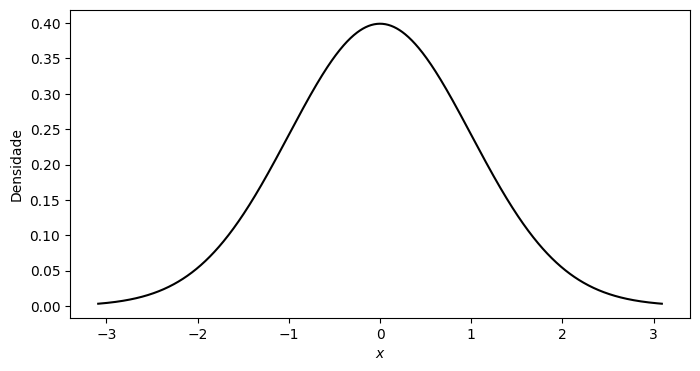

In [17]:
plt.subplots(figsize=(8,4))
x = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.999), 1000)
plt.plot(x, stats.norm.pdf(x), 'k', label='norm pdf')
plt.xlabel("$x$")
plt.ylabel("Densidade")
plt.show()

### Apresentando as amostras

In [18]:
# for seed in seed_to_visualize_data:
#     rng = np.random.default_rng(seed)
#     normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
#     plt.subplots(figsize=(8,4))
#     x = np.linspace(stats.norm.ppf(0.00001), stats.norm.ppf(0.99999), 1000)
#     plt.plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
#     plt.scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed}')
#     plt.xlabel("$x$")
#     plt.ylabel("Densidade")
#     plt.legend()
#     plt.show()    

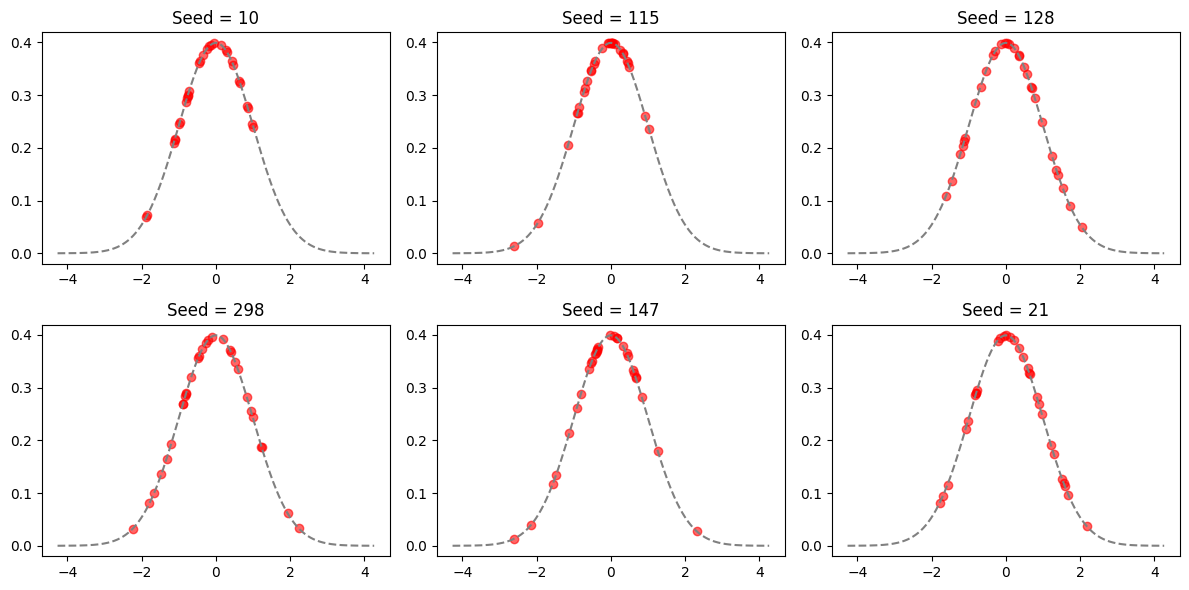

In [19]:
x = np.linspace(stats.norm.ppf(0.00001), stats.norm.ppf(0.99999), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
ax[0,0].scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
ax[0,1].scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 2
ax[0,2].plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
ax[0,2].scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")



i = 3
ax[1,0].plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
ax[1,0].scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
ax[1,1].scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
ax[1,2].scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

## Calculando

In [20]:
ks_result = []
ad_result = []
li_result = []
shapiro_result = []
abdi_result = []
n_rep_result = []
alpha_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))

    for n in n_rep:
        shapiro_result.append(shapiro_wilk_test(normal_data[:n]))
        ks_result.append(ks_test(normal_data[:n]))
        ad_result.append(anderson_darling(normal_data[:n]))
        li_result.append(lilliefors_test(normal_data[:n]))
        abdi_result.append(abdi_molin(normal_data[:n]))
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = flatten(shapiro_result)
ks_result = flatten(ks_result)
li_result = flatten(li_result)
ad_result = flatten(ad_result)
abdi_result = flatten(abdi_result)
n_rep_result = flatten(n_rep_result)
alpha_result = flatten(alpha_result)        

df_data = pd.DataFrame({
    "Shapiro-Wilk": shapiro_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Anderson-Darling": ad_result,    
    "Abdi-Molin": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})


df_data.head()

,Shapiro-Wilk,Kolmogorov-Smirnov,Lilliefors,Anderson-Darling,Abdi-Molin,n amostral,Alpha
0,True,True,True,True,True,4,0.01
1,True,True,True,True,True,4,0.05
2,True,True,True,True,True,4,0.10
3,True,True,True,True,True,5,0.01
4,True,True,True,True,True,5,0.05


## Heeatmap

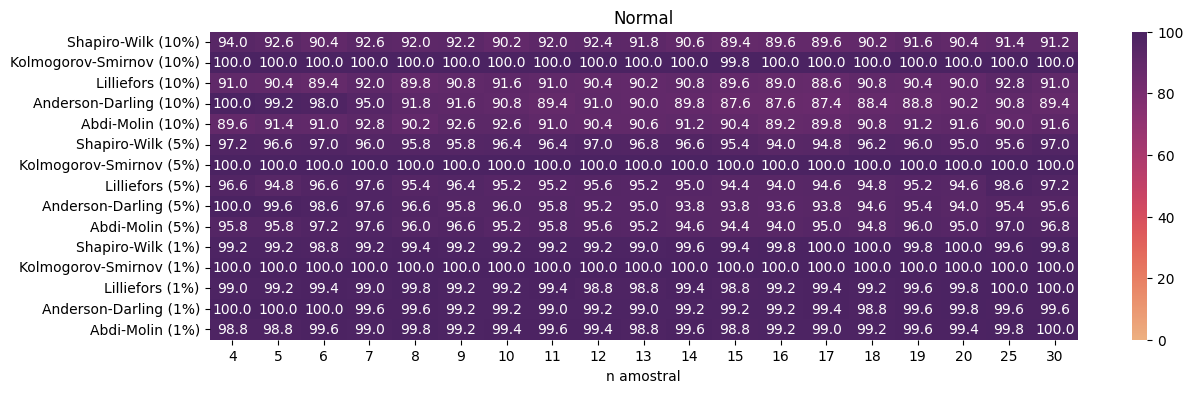

In [21]:
make_heatmap(df_data, "Normal", n_samples)

## Gráfico de barras por teste

In [22]:
df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

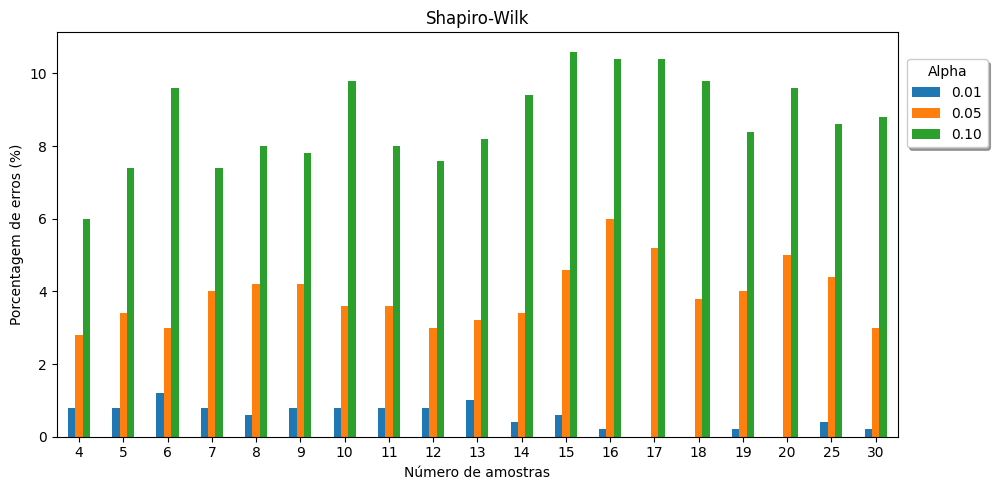

In [23]:
make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=False)

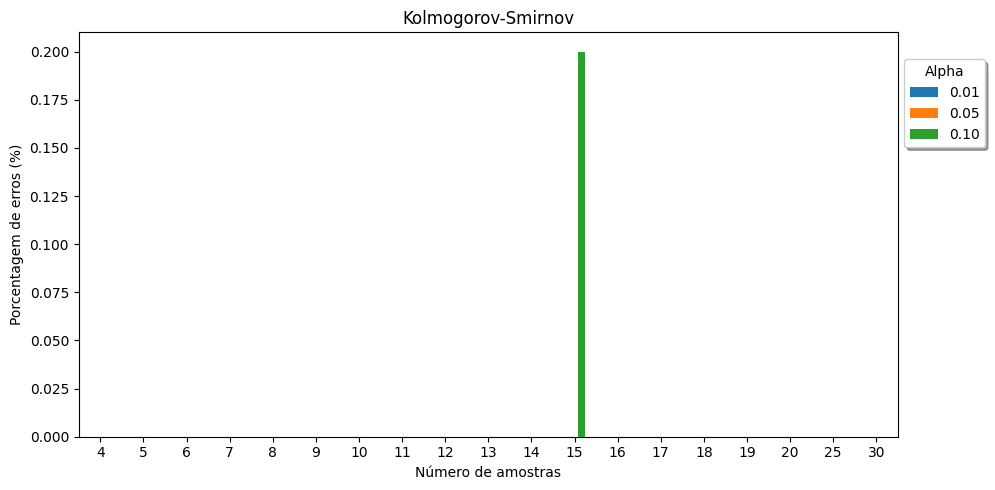

In [24]:
make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=False)

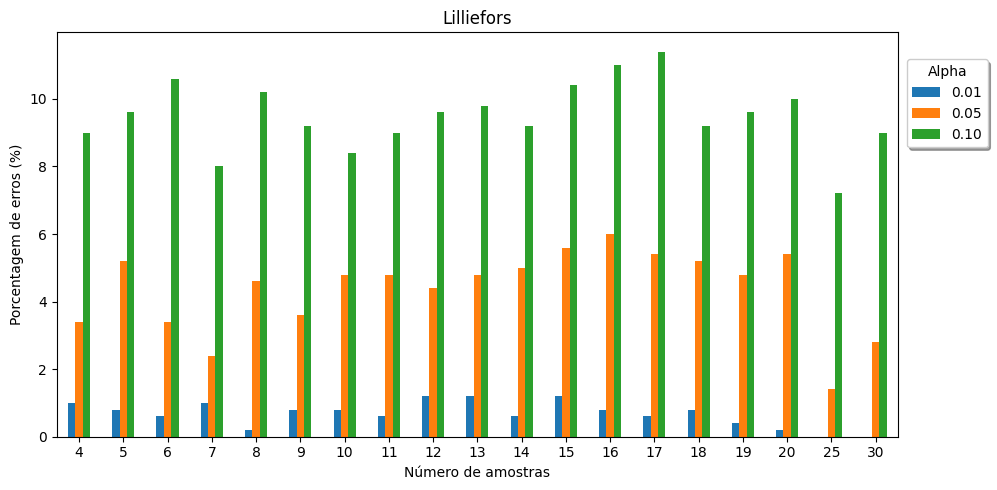

In [25]:
make_bar_plot(df_li, n_samples, "Lilliefors", kind=False)

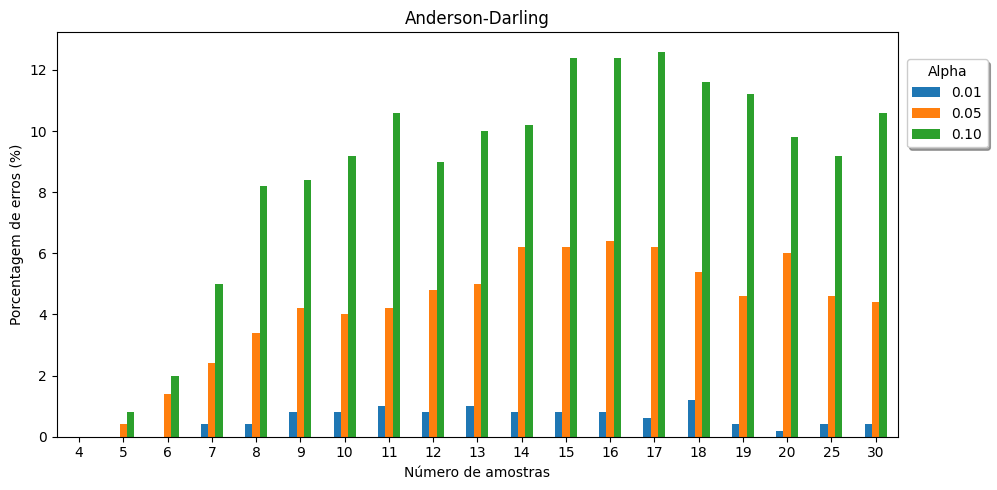

In [26]:
make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=False)

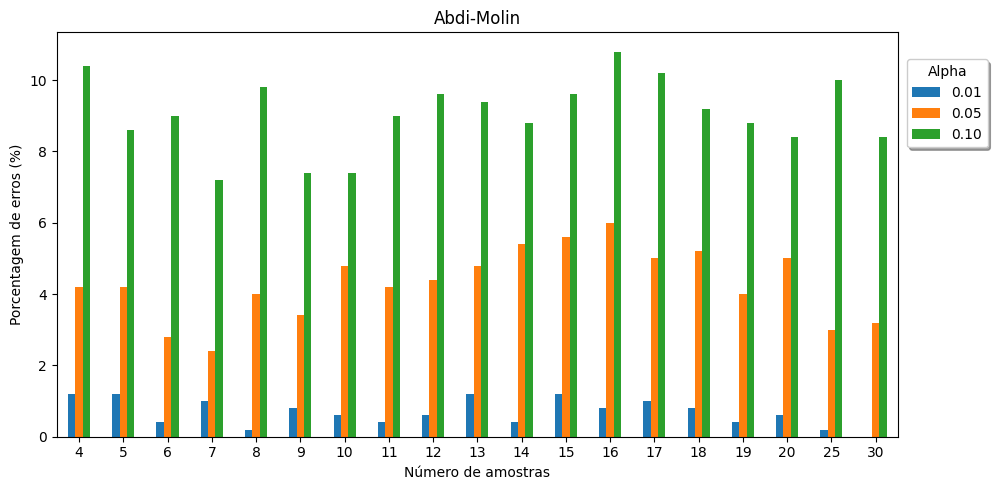

In [27]:
make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=False)

### calculo para juntar tudo

In [28]:
df_normal = make_calc(df_data, True)
df_normal["Distribution"] = "Normal"

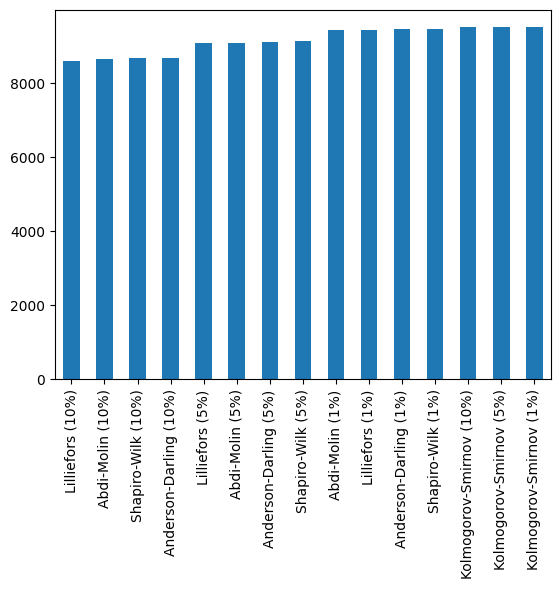

In [29]:
plot_all_results(df_normal)

## Dados provenientes de uma distribuição Exponencial

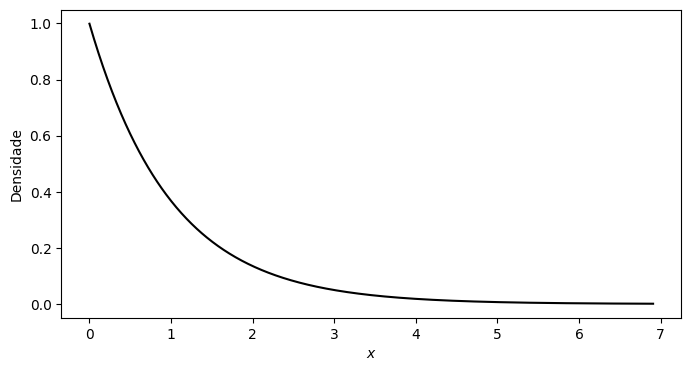

In [30]:
plt.subplots(figsize=(8,4))
x = np.linspace(stats.expon.ppf(0.001), stats.expon.ppf(0.999), 1000)
plt.plot(x, stats.expon.pdf(x), 'k', label='norm pdf')
plt.xlabel("$x$")
plt.ylabel("Densidade")
plt.show()

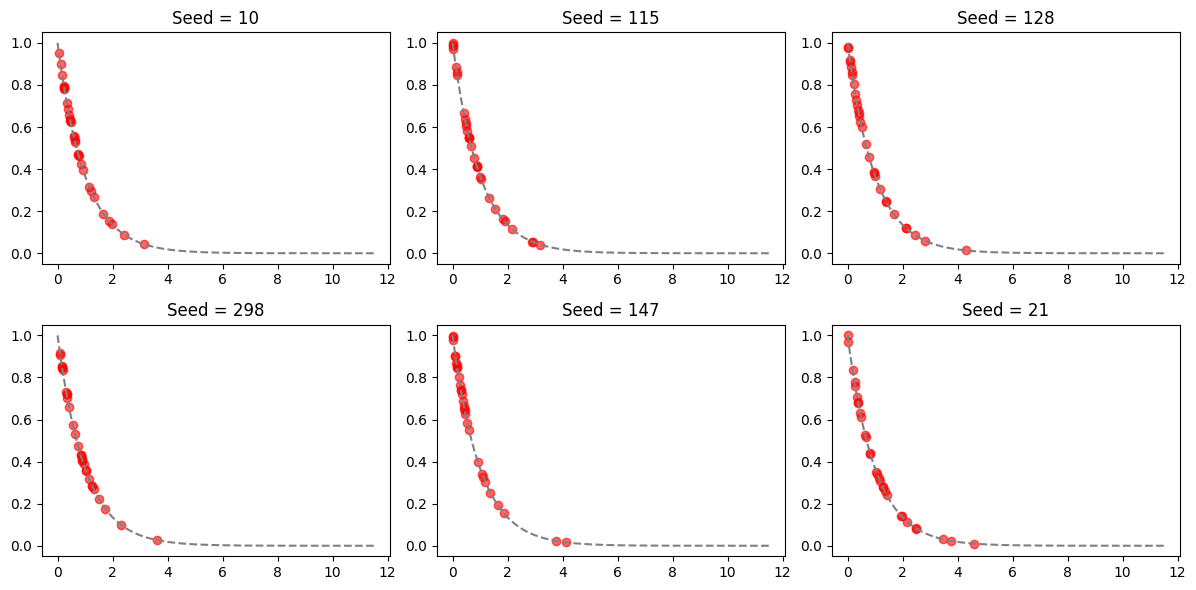

In [31]:
x = np.linspace(stats.expon.ppf(0.00001), stats.expon.ppf(0.99999), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.expon.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
expon_data = rng.exponential(scale=1.0, size=max(n_rep))
ax[0,0].scatter(expon_data, stats.expon.pdf(expon_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.expon.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
expon_data = rng.exponential(scale=1.0, size=max(n_rep))
ax[0,1].scatter(expon_data, stats.expon.pdf(expon_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 2
ax[0,2].plot(x, stats.expon.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
expon_data = rng.exponential(scale=1.0, size=max(n_rep))
ax[0,2].scatter(expon_data, stats.expon.pdf(expon_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")



i = 3
ax[1,0].plot(x, stats.expon.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
expon_data = rng.exponential(scale=1.0, size=max(n_rep))
ax[1,0].scatter(expon_data, stats.expon.pdf(expon_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.expon.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
expon_data = rng.exponential(scale=1.0, size=max(n_rep))
ax[1,1].scatter(expon_data, stats.expon.pdf(expon_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.expon.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
expon_data = rng.exponential(scale=1.0, size=max(n_rep))
ax[1,2].scatter(expon_data, stats.expon.pdf(expon_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

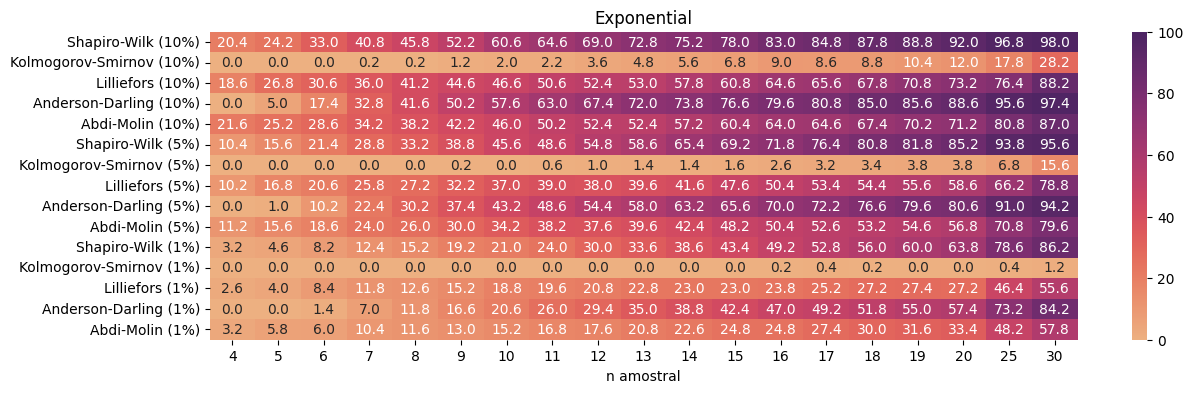

In [32]:
ks_result = []
ad_result = []
li_result = []
shapiro_result = []
abdi_result = []
n_rep_result = []
alpha_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    exponential_data = rng.exponential(scale=1.0, size=max(n_rep))

    for n in n_rep:
        shapiro_result.append(shapiro_wilk_test(exponential_data[:n]))
        ks_result.append(ks_test(exponential_data[:n]))
        ad_result.append(anderson_darling(exponential_data[:n]))
        li_result.append(lilliefors_test(exponential_data[:n]))
        abdi_result.append(abdi_molin(exponential_data[:n]))
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = flatten(shapiro_result)
ks_result = flatten(ks_result)
li_result = flatten(li_result)
ad_result = flatten(ad_result)
abdi_result = flatten(abdi_result)
n_rep_result = flatten(n_rep_result)
alpha_result = flatten(alpha_result)        

df_data = pd.DataFrame({
    "Shapiro-Wilk": shapiro_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Anderson-Darling": ad_result,    
    "Abdi-Molin": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

make_heatmap(df_data, "Exponential", n_samples, normal=False)

In [33]:
df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

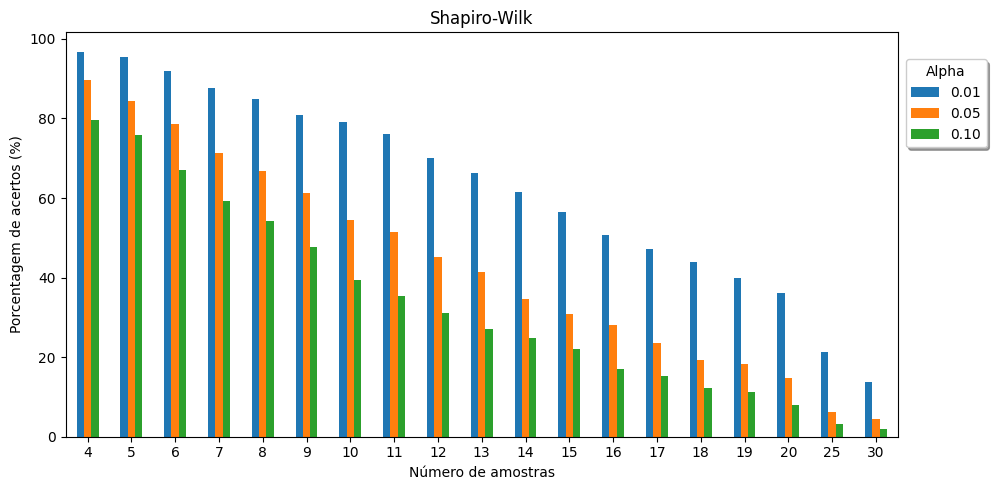

In [34]:
make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=True)

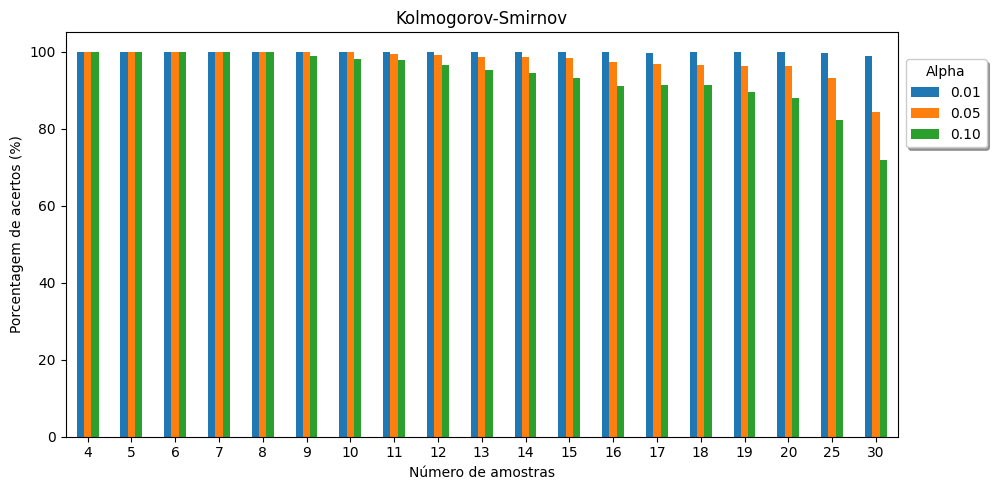

In [35]:
make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=True)

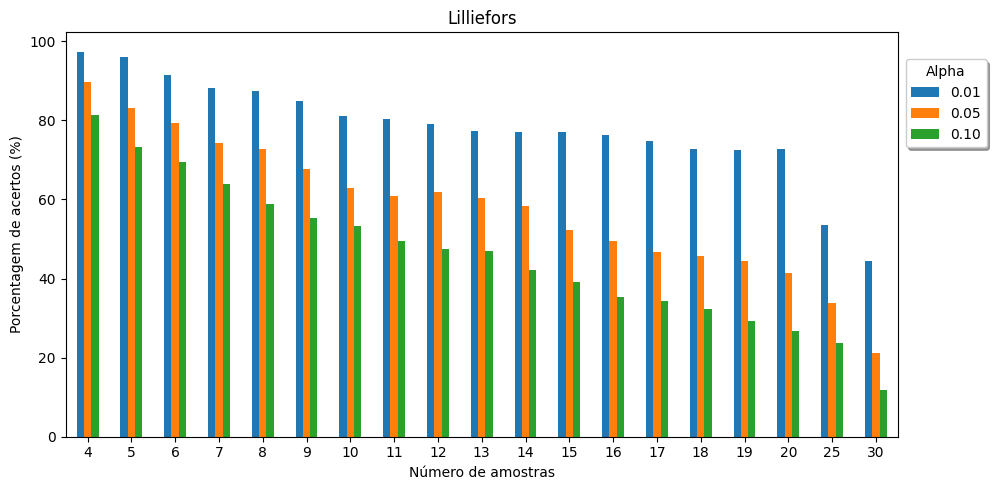

In [36]:
make_bar_plot(df_li, n_samples, "Lilliefors", kind=True)

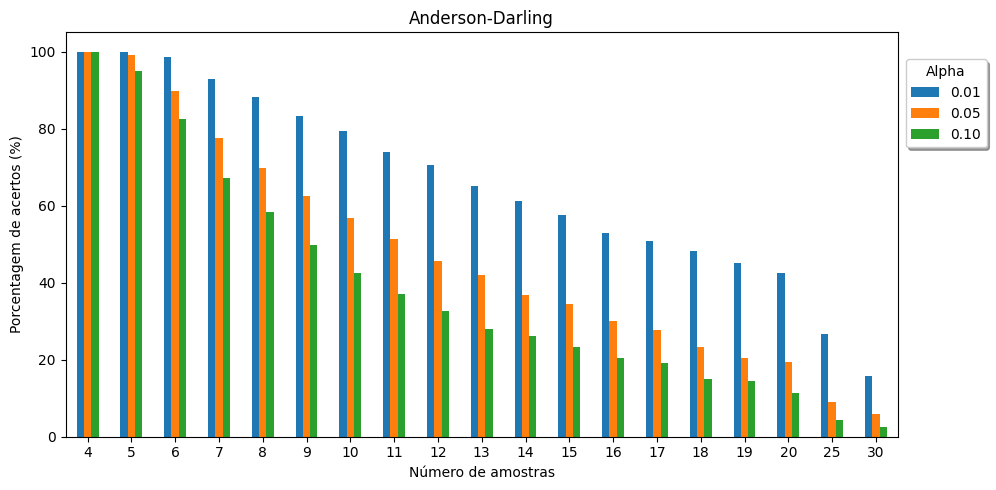

In [37]:
make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=True)

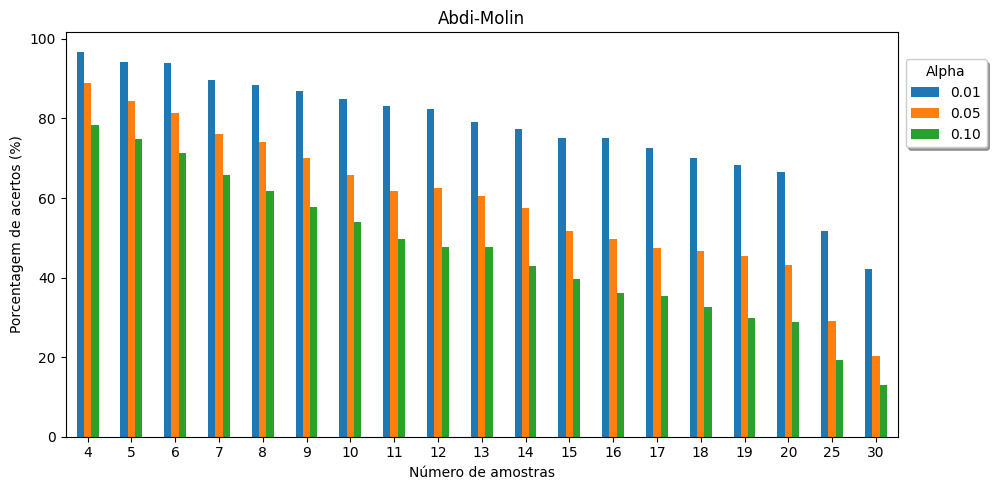

In [38]:
make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=True)

### calculo para juntar tudo

In [39]:
df_exponential = make_calc(df_data, False)
df_exponential["Distribution"] = "Exponential"

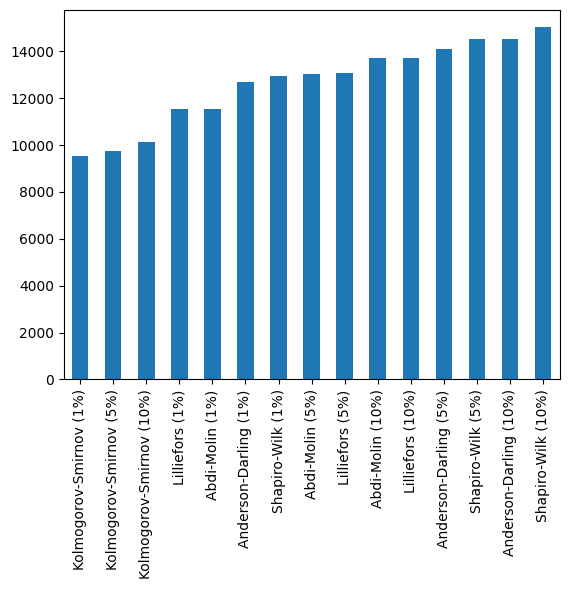

In [40]:
plot_all_results(pd.concat([df_normal,df_exponential]))

## Dados provenientes de uma distribuição Uniforme

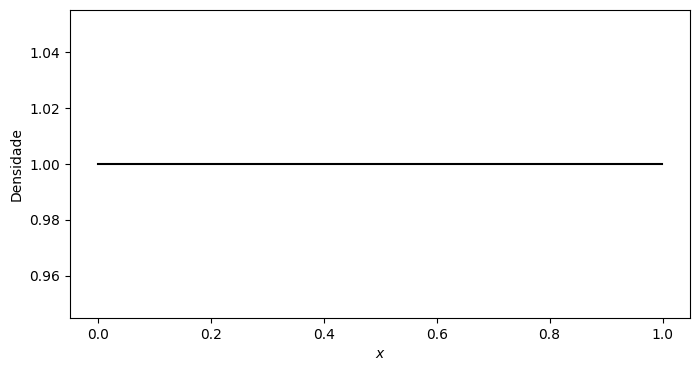

In [41]:
plt.subplots(figsize=(8,4))
x = np.linspace(stats.uniform.ppf(0.001), stats.uniform.ppf(0.999), 1000)
plt.plot(x, stats.uniform.pdf(x), 'k', label='norm pdf')
plt.xlabel("$x$")
plt.ylabel("Densidade")
plt.show()

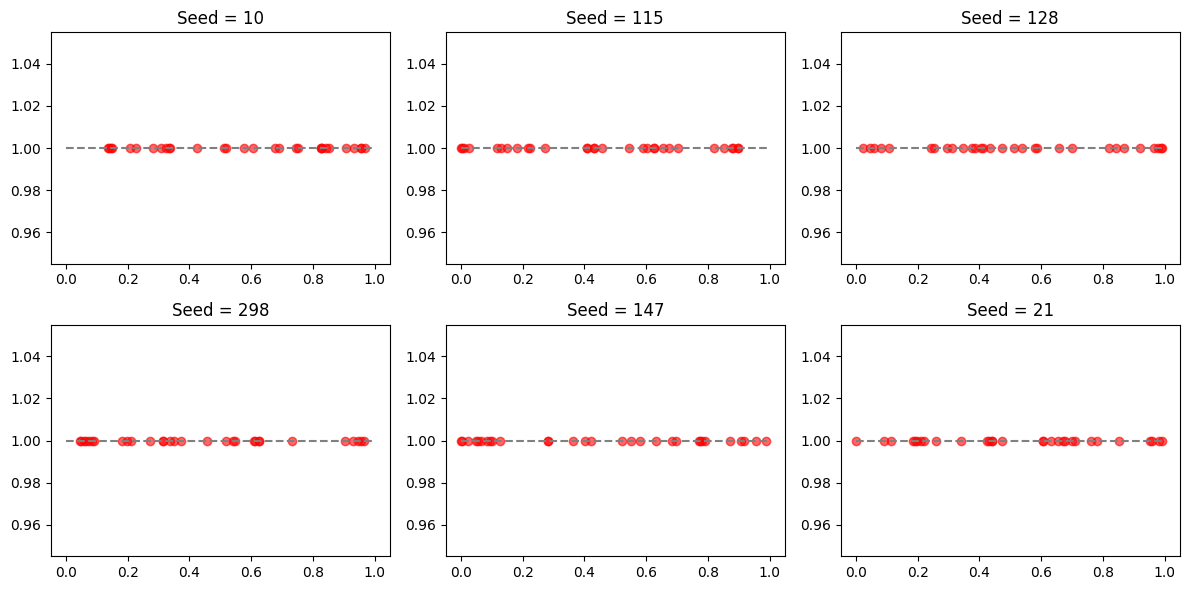

In [42]:
x = np.linspace(stats.uniform.ppf(0.00001), stats.uniform.ppf(0.99999), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.uniform.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
uniform_data = rng.uniform(size=max(n_rep))
ax[0,0].scatter(uniform_data, stats.uniform.pdf(uniform_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.uniform.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
uniform_data = rng.uniform(size=max(n_rep))
ax[0,1].scatter(uniform_data, stats.uniform.pdf(uniform_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 2
ax[0,2].plot(x, stats.uniform.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
uniform_data = rng.uniform(size=max(n_rep))
ax[0,2].scatter(uniform_data, stats.uniform.pdf(uniform_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")



i = 3
ax[1,0].plot(x, stats.uniform.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
uniform_data = rng.uniform(size=max(n_rep))
ax[1,0].scatter(uniform_data, stats.uniform.pdf(uniform_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.uniform.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
uniform_data = rng.uniform(size=max(n_rep))
ax[1,1].scatter(uniform_data, stats.uniform.pdf(uniform_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.uniform.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
uniform_data = rng.uniform(size=max(n_rep))
ax[1,2].scatter(uniform_data, stats.uniform.pdf(uniform_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

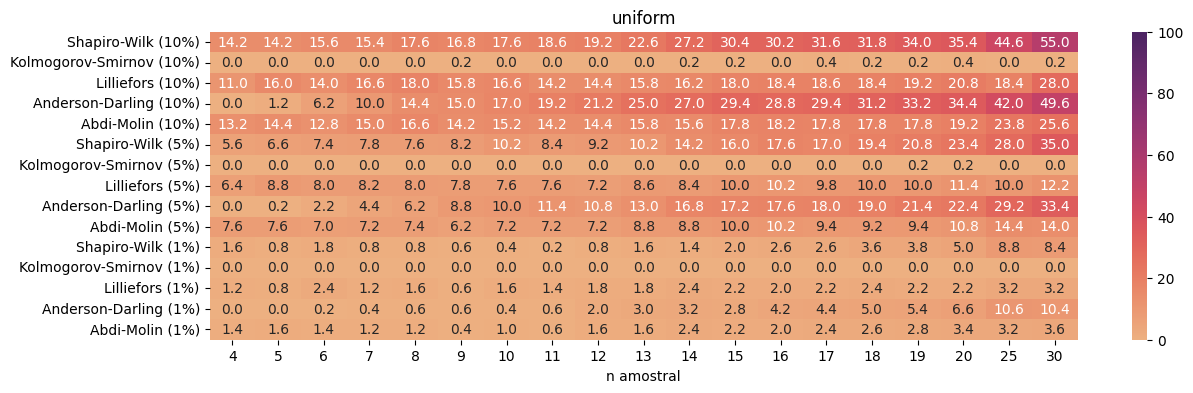

In [43]:
ks_result = []
ad_result = []
li_result = []
shapiro_result = []
abdi_result = []
n_rep_result = []
alpha_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    uniform_data = rng.uniform(size=max(n_rep))

    for n in n_rep:
        shapiro_result.append(shapiro_wilk_test(uniform_data[:n]))
        ks_result.append(ks_test(uniform_data[:n]))
        ad_result.append(anderson_darling(uniform_data[:n]))
        li_result.append(lilliefors_test(uniform_data[:n]))
        abdi_result.append(abdi_molin(uniform_data[:n]))
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = flatten(shapiro_result)
ks_result = flatten(ks_result)
li_result = flatten(li_result)
ad_result = flatten(ad_result)
abdi_result = flatten(abdi_result)
n_rep_result = flatten(n_rep_result)
alpha_result = flatten(alpha_result)        

df_data = pd.DataFrame({
    "Shapiro-Wilk": shapiro_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Anderson-Darling": ad_result,    
    "Abdi-Molin": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

make_heatmap(df_data, "uniform", n_samples, normal=False)



In [44]:
df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

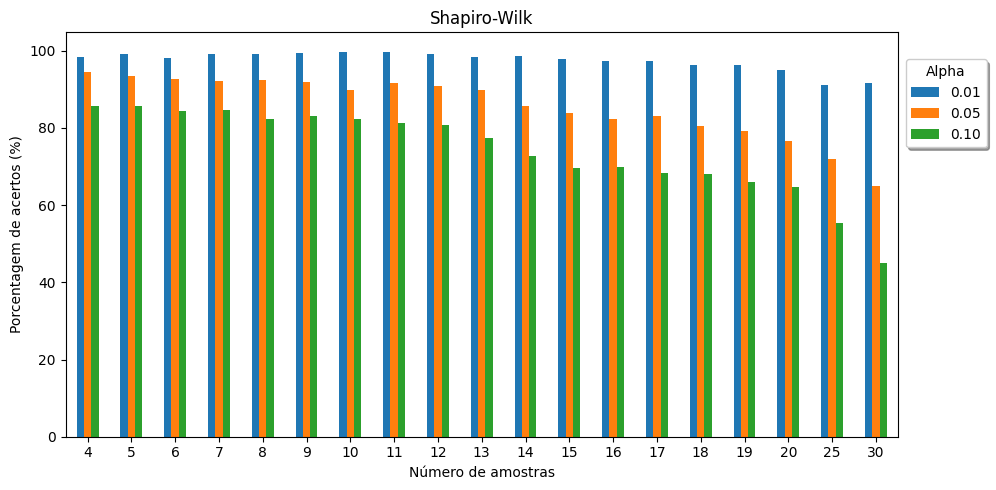

In [45]:
make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=True)

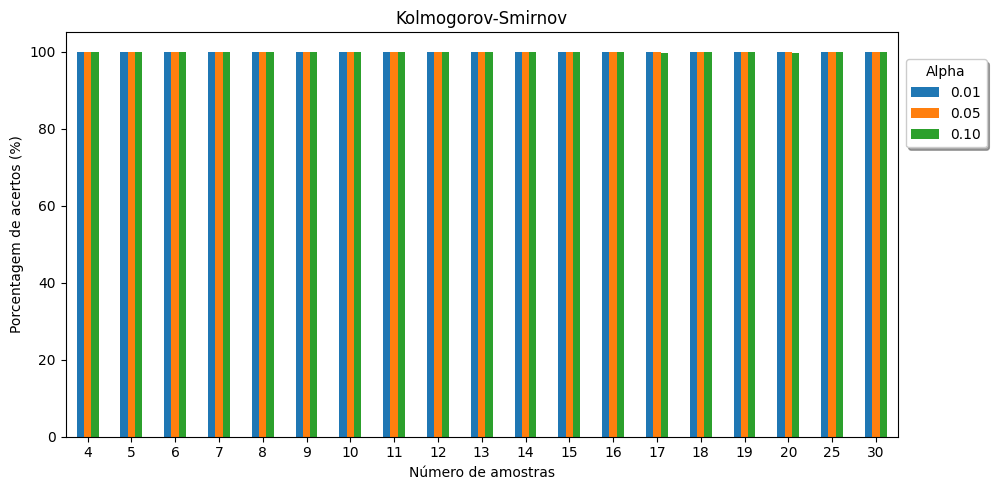

In [46]:
make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=True)

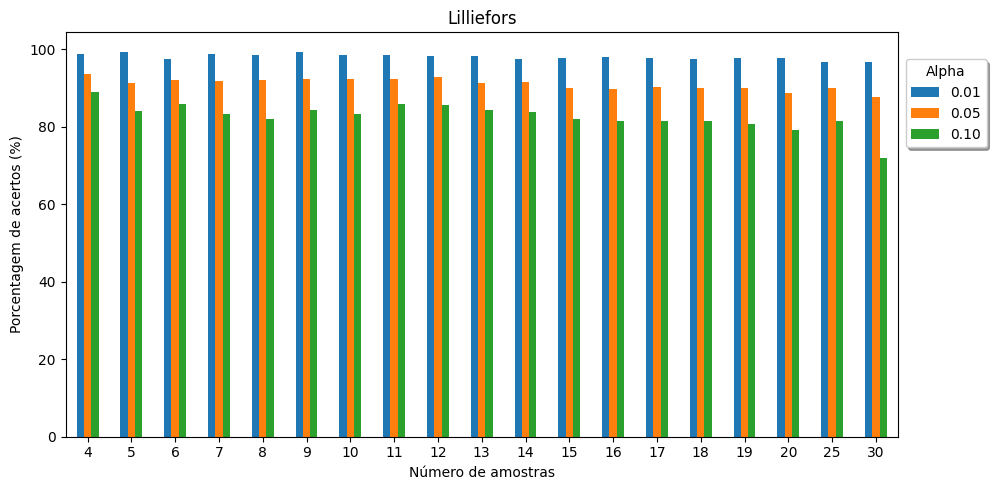

In [47]:
make_bar_plot(df_li, n_samples, "Lilliefors", kind=True)

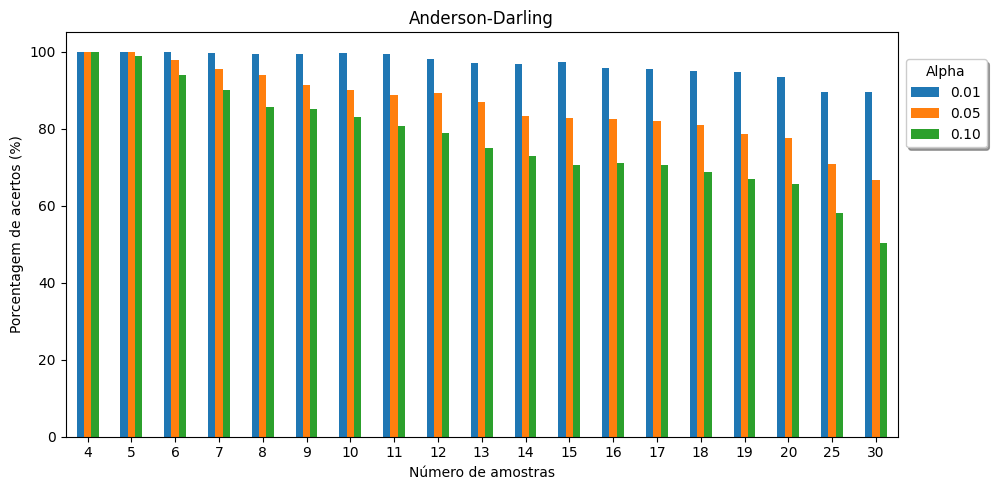

In [48]:
make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=True)

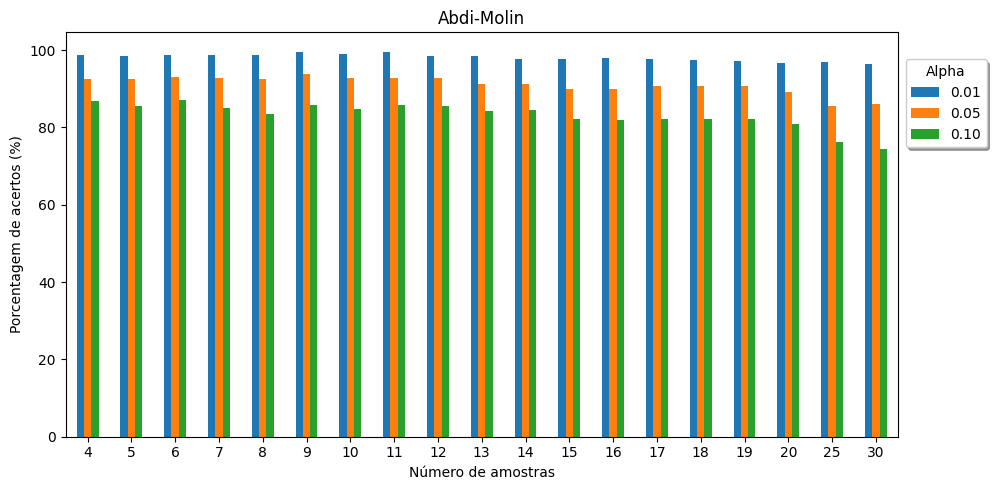

In [49]:
make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=True)

### Calculo para juntar tudo 

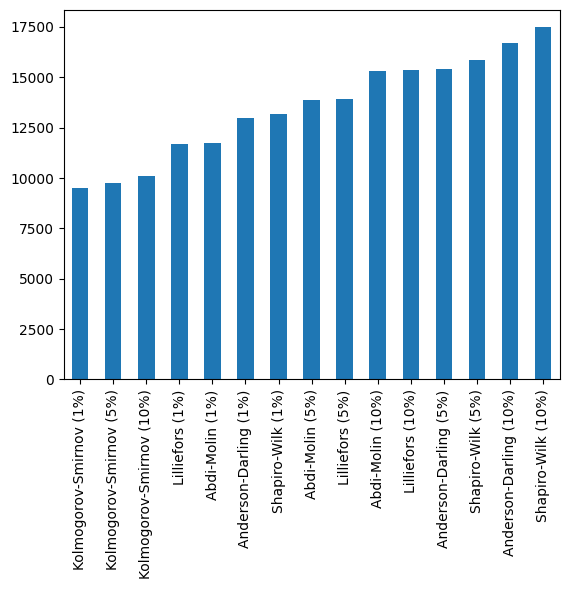

In [50]:
df_uniform = make_calc(df_data, False)
df_uniform["Distribution"] = "Uniform"
plot_all_results(pd.concat([df_normal, df_exponential, df_uniform]))

## Dados proveientes de uma distribuição Lognormal

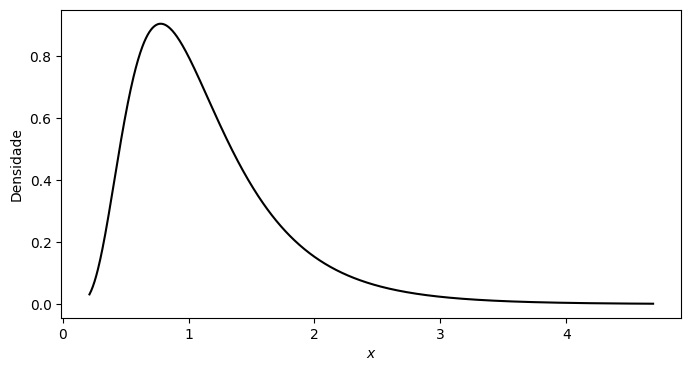

In [51]:
s = .5

plt.subplots(figsize=(8,4))
x = np.linspace(stats.lognorm.ppf(0.001, s=s), stats.lognorm.ppf(0.999, s=s), 1000)
plt.plot(x, stats.lognorm.pdf(x, s=s), 'k', label='norm pdf')
plt.xlabel("$x$")
plt.ylabel("Densidade")
plt.show()

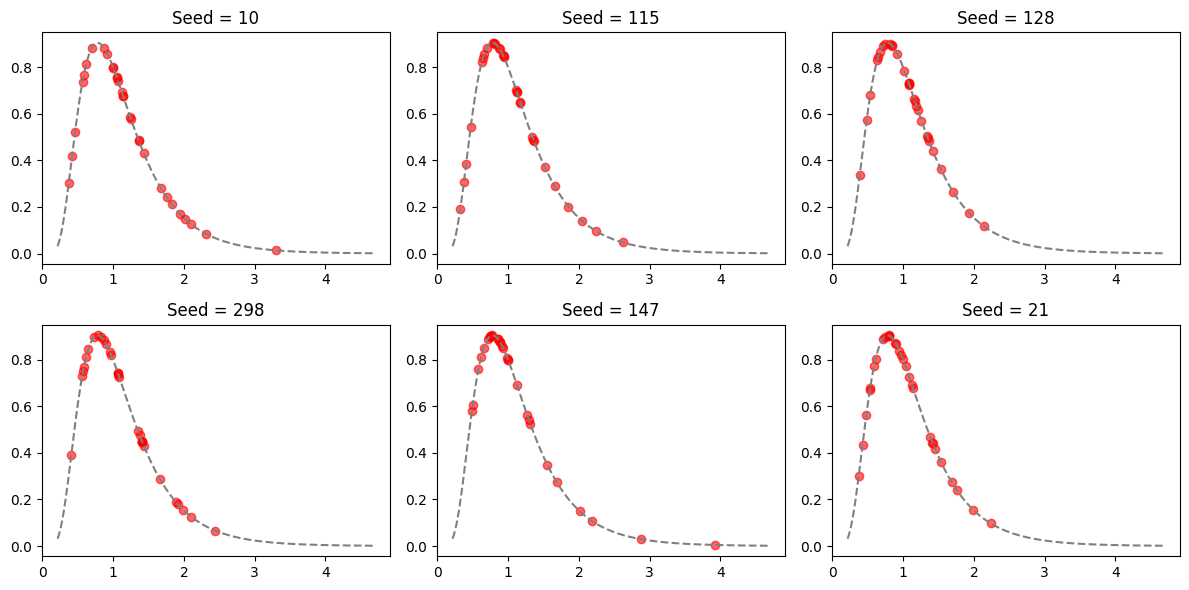

In [52]:
s = .5
x = np.linspace(stats.lognorm.ppf(0.001, s=s), stats.lognorm.ppf(0.999, s=s), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.lognorm.pdf(x, s=s), ls='--', c="gray", label='Teórico')
lognorm_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,0].scatter(lognorm_data, stats.lognorm.pdf(lognorm_data, s=s), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.lognorm.pdf(x, s=s), ls='--', c="gray", label='Teórico')
lognorm_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,1].scatter(lognorm_data, stats.lognorm.pdf(lognorm_data, s=s), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 2
ax[0,2].plot(x, stats.lognorm.pdf(x, s=s), ls='--', c="gray", label='Teórico')
lognorm_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,2].scatter(lognorm_data, stats.lognorm.pdf(lognorm_data, s=s), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 3
ax[1,0].plot(x, stats.lognorm.pdf(x, s=s), ls='--', c="gray", label='Teórico')
lognorm_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,0].scatter(lognorm_data, stats.lognorm.pdf(lognorm_data, s=s), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.lognorm.pdf(x, s=s), ls='--', c="gray", label='Teórico')
lognorm_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,1].scatter(lognorm_data, stats.lognorm.pdf(lognorm_data, s=s), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.lognorm.pdf(x, s=s), ls='--', c="gray", label='Teórico')
lognorm_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,2].scatter(lognorm_data, stats.lognorm.pdf(lognorm_data, s=s), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

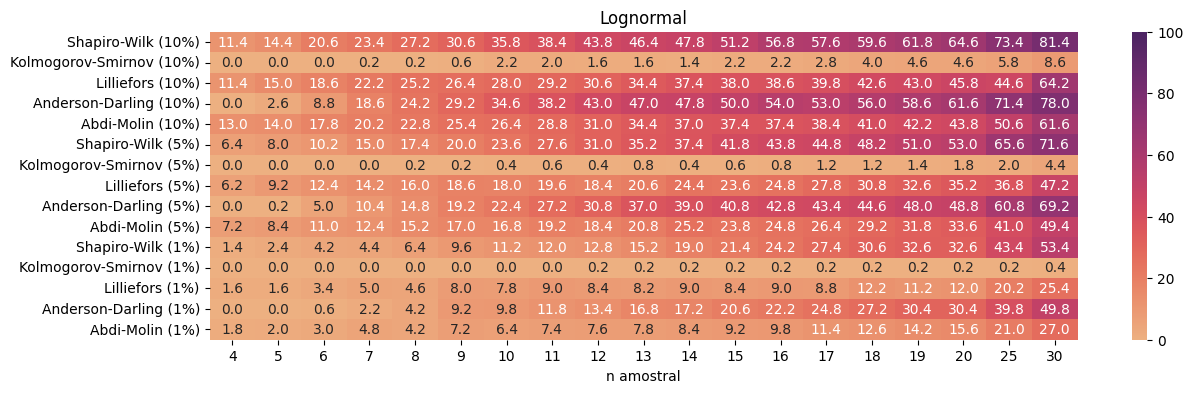

In [53]:
ks_result = []
ad_result = []
li_result = []
shapiro_result = []
abdi_result = []
n_rep_result = []
alpha_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    lognormal_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed)

    for n in n_rep:
        shapiro_result.append(shapiro_wilk_test(lognormal_data[:n]))
        ks_result.append(ks_test(lognormal_data[:n]))
        ad_result.append(anderson_darling(lognormal_data[:n]))
        li_result.append(lilliefors_test(lognormal_data[:n]))
        abdi_result.append(abdi_molin(lognormal_data[:n]))
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = flatten(shapiro_result)
ks_result = flatten(ks_result)
li_result = flatten(li_result)
ad_result = flatten(ad_result)
abdi_result = flatten(abdi_result)
n_rep_result = flatten(n_rep_result)
alpha_result = flatten(alpha_result)        

df_data = pd.DataFrame({
    "Shapiro-Wilk": shapiro_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Anderson-Darling": ad_result,    
    "Abdi-Molin": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

make_heatmap(df_data, "Lognormal", n_samples, normal=False)



In [54]:
df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

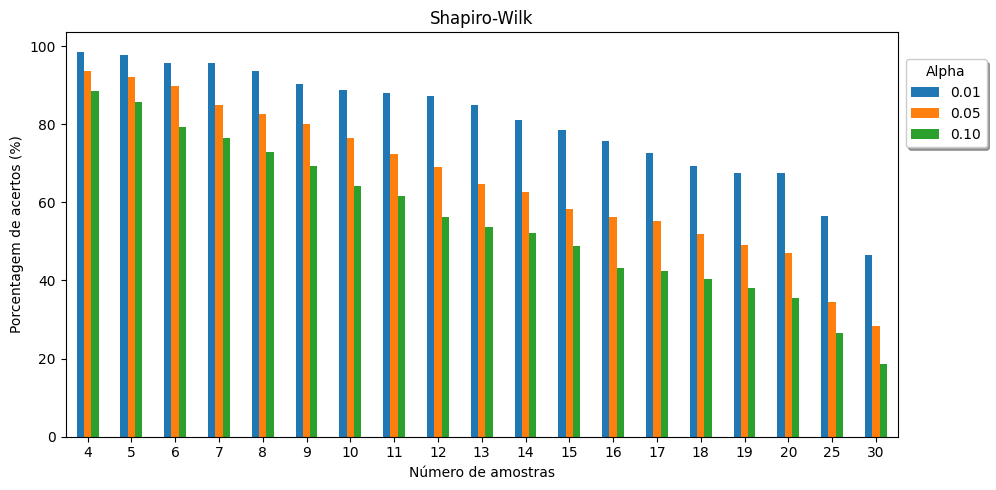

In [55]:
make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=True)

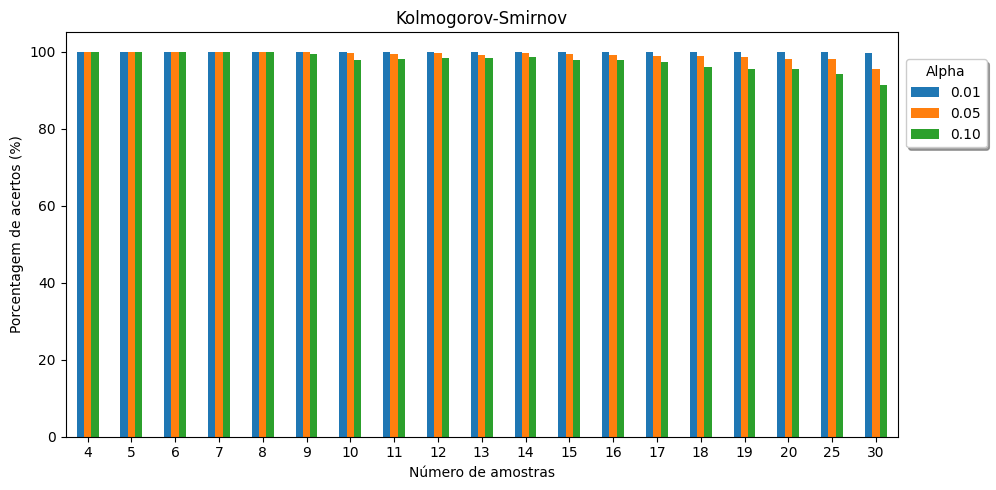

In [56]:
make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=True)

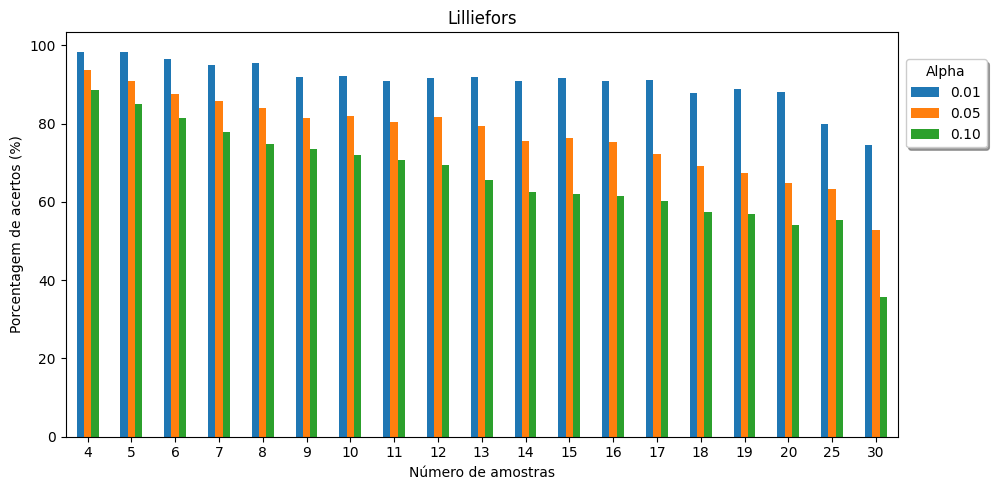

In [57]:
make_bar_plot(df_li, n_samples, "Lilliefors", kind=True)

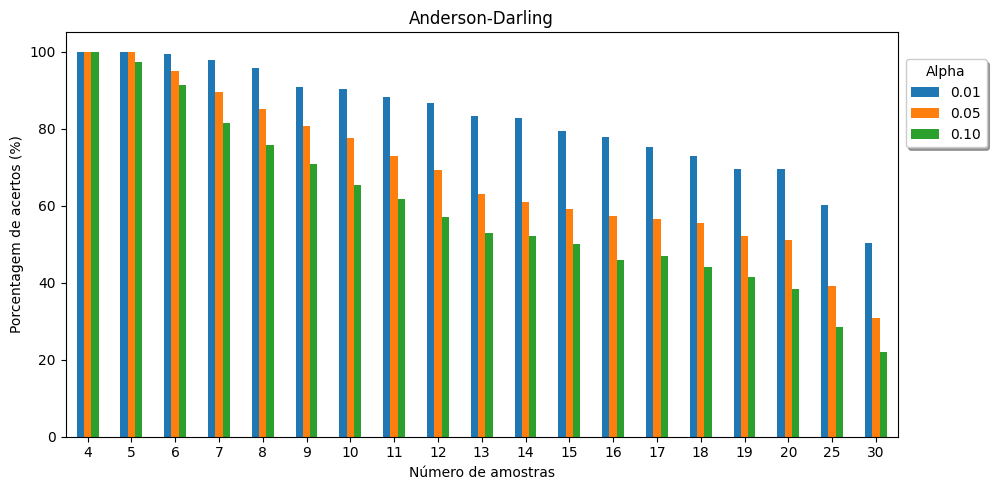

In [58]:
make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=True)

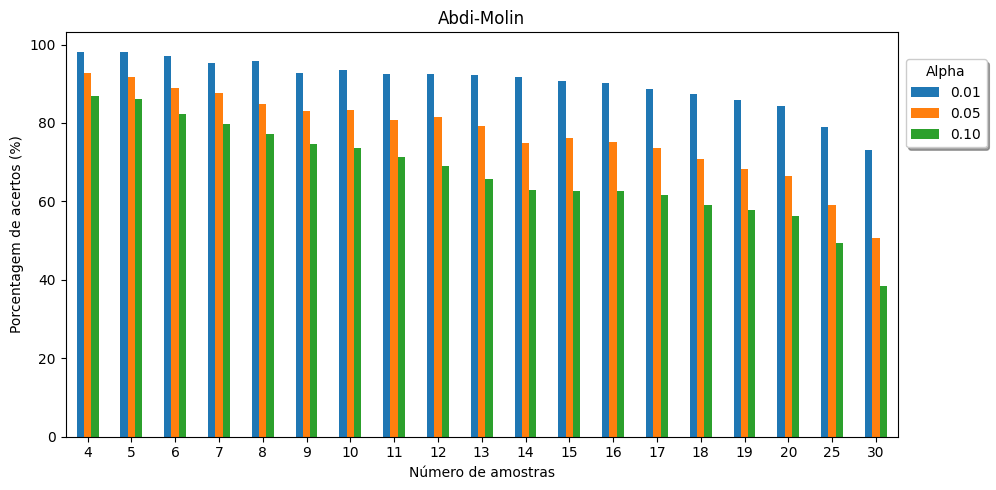

In [59]:
make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=True)

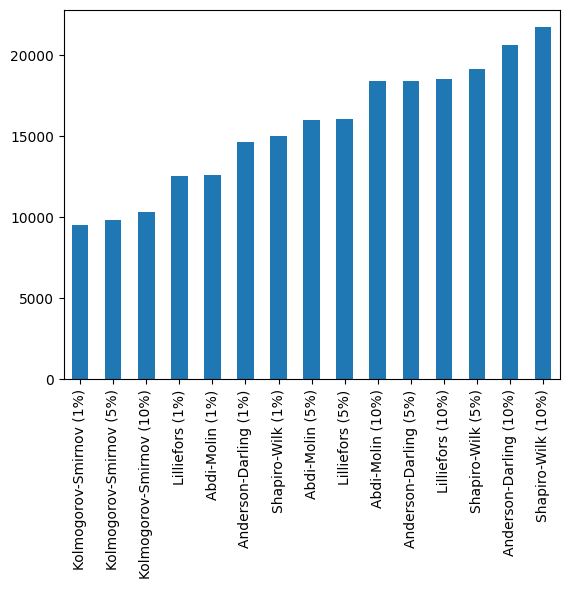

In [60]:
df_lognormal = make_calc(df_data, False)
df_lognormal["Distribution"] = "Lognormal"
plot_all_results(pd.concat([df_normal, df_exponential, df_uniform, df_lognormal]))

## Dados provenientes de uma distribuição t de Student (df=5)

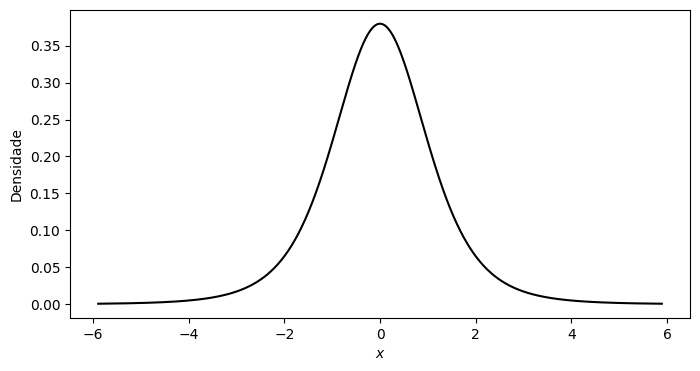

In [61]:
df = 5

plt.subplots(figsize=(8,4))
x = np.linspace(stats.t.ppf(0.001, df=df), stats.t.ppf(0.999, df=df), 1000)
plt.plot(x, stats.t.pdf(x, df=df), 'k', label='norm pdf')
plt.xlabel("$x$")
plt.ylabel("Densidade")
plt.show()


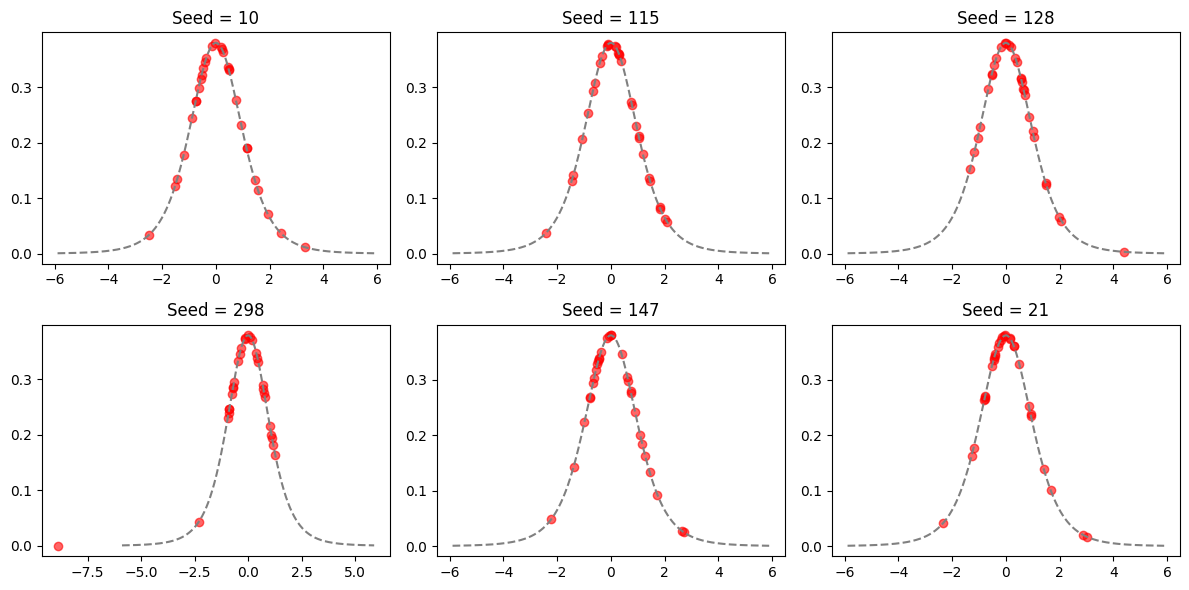

In [62]:
df = 5
x = np.linspace(stats.t.ppf(0.001, df=df), stats.t.ppf(0.999, df=df), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,0].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,1].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 2
ax[0,2].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,2].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 3
ax[1,0].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,0].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,1].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,2].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

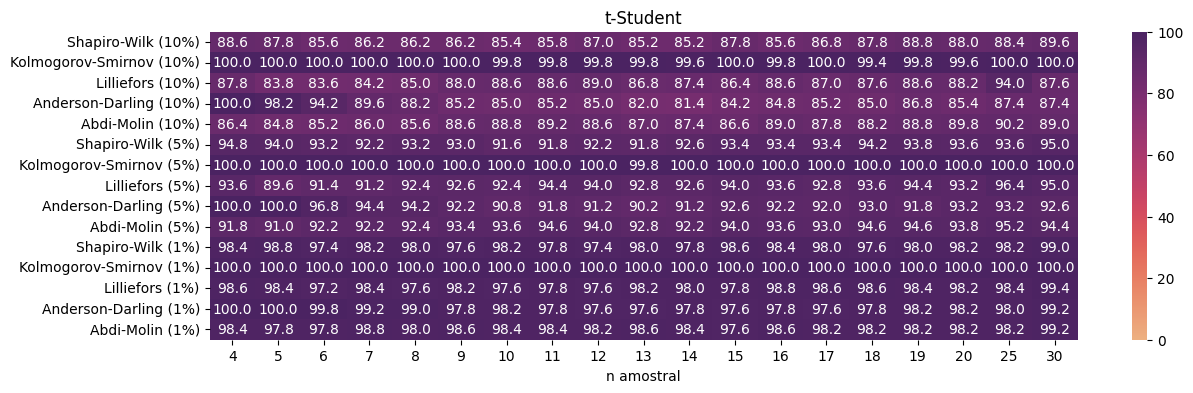

In [63]:
ks_result = []
ad_result = []
li_result = []
shapiro_result = []
abdi_result = []
n_rep_result = []
alpha_result = []

for seed in seeds:
    for n in n_rep:
        t_data = stats.t.rvs(n-1, loc=0, scale=1, size=n, random_state=seed)
        shapiro_result.append(shapiro_wilk_test(t_data[:n]))
        ks_result.append(ks_test(t_data[:n]))
        ad_result.append(anderson_darling(t_data[:n]))
        li_result.append(lilliefors_test(t_data[:n]))
        abdi_result.append(abdi_molin(t_data[:n]))
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = flatten(shapiro_result)
ks_result = flatten(ks_result)
li_result = flatten(li_result)
ad_result = flatten(ad_result)
abdi_result = flatten(abdi_result)
n_rep_result = flatten(n_rep_result)
alpha_result = flatten(alpha_result)        

df_data = pd.DataFrame({
    "Shapiro-Wilk": shapiro_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Anderson-Darling": ad_result,    
    "Abdi-Molin": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

make_heatmap(df_data, "t-Student", n_samples, normal=True)


In [64]:
df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

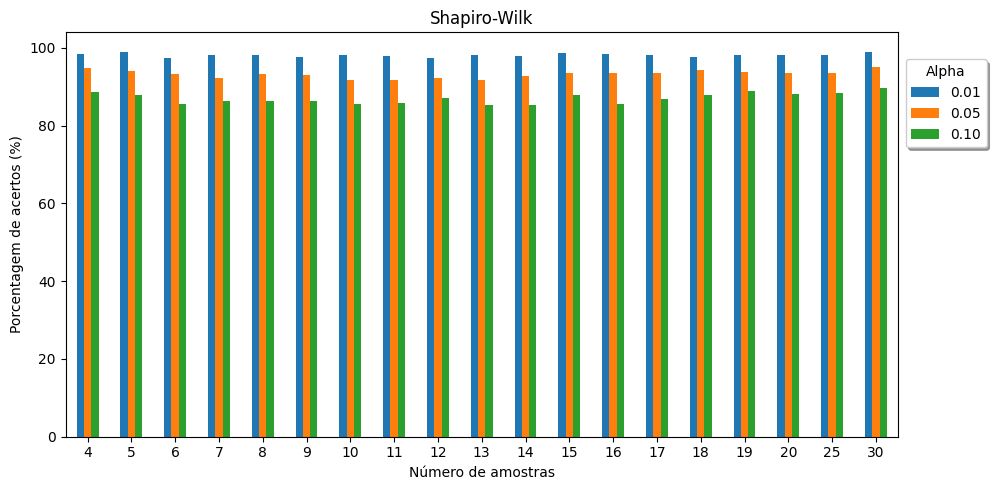

In [65]:
make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=True)

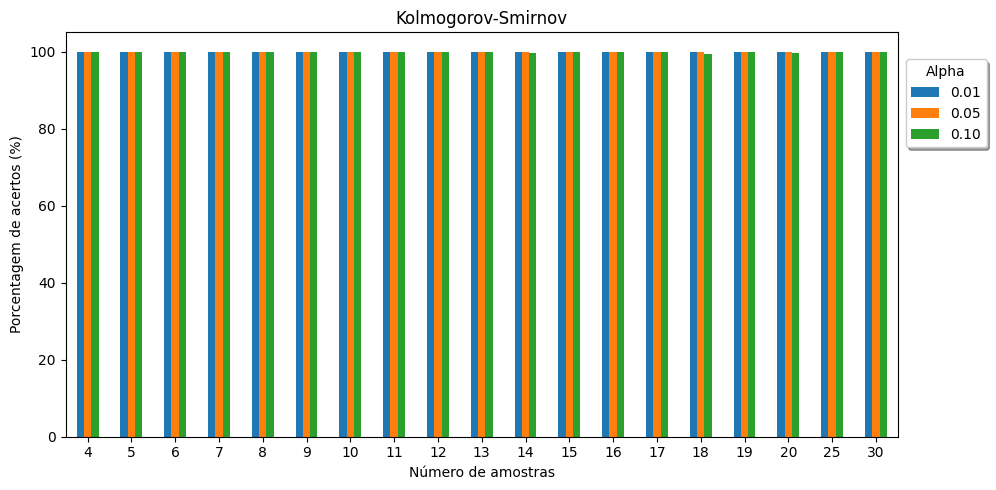

In [66]:
make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=True)

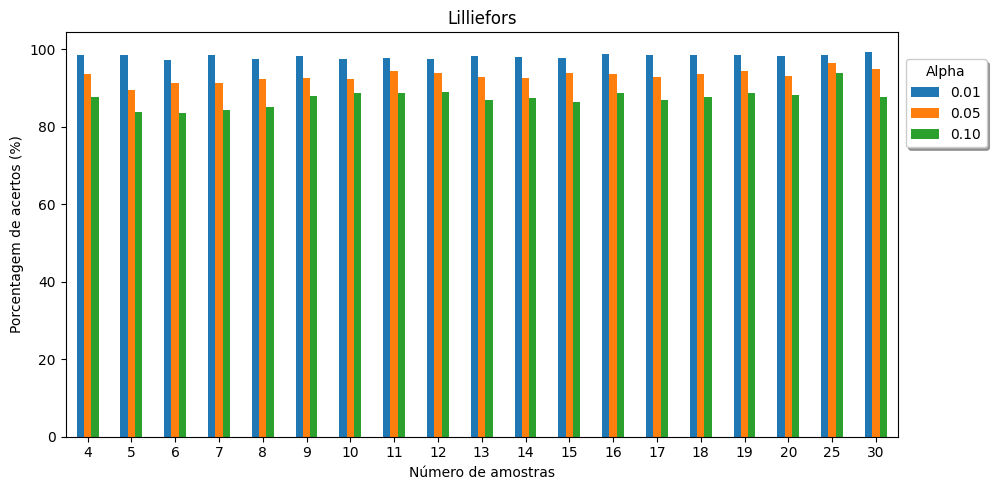

In [67]:
make_bar_plot(df_li, n_samples, "Lilliefors", kind=True)

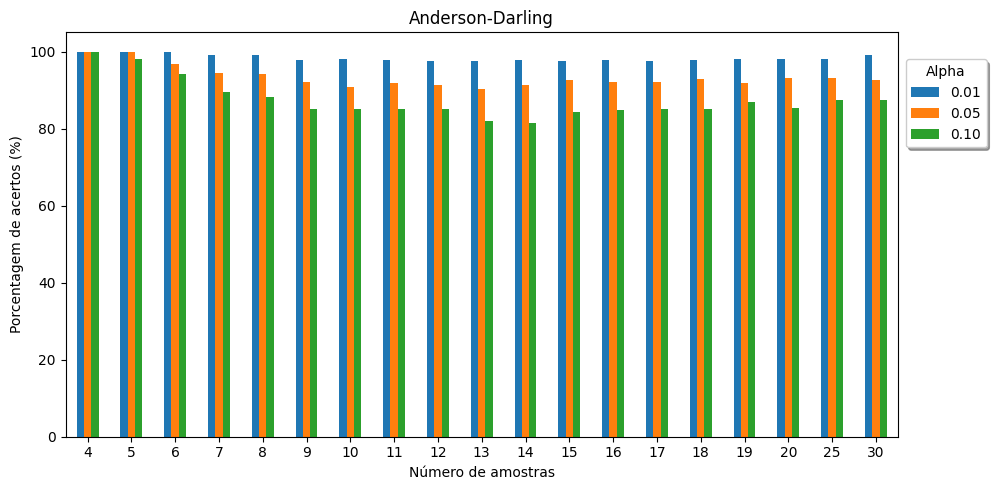

In [68]:
make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=True)

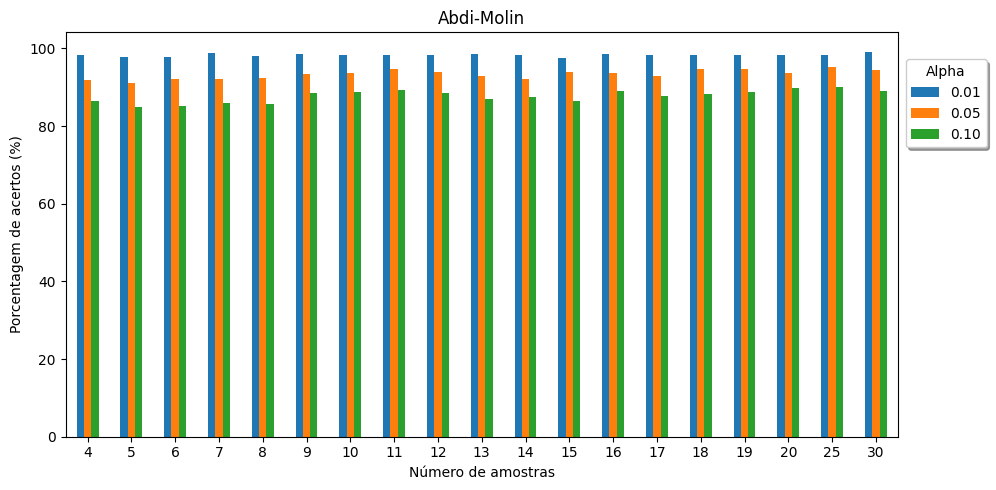

In [69]:
make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=True)

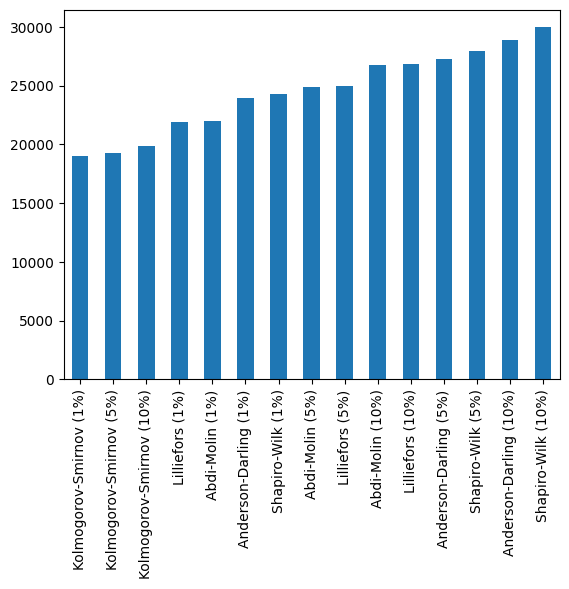

In [70]:
df_t_student = make_calc(df_data, True)
df_t_student["Distribution"] = "t-Student"
plot_all_results(pd.concat([df_normal, df_exponential, df_uniform, df_lognormal, df_t_student]))

In [71]:
df_normal_acertos = df_normal.sum(numeric_only = True).to_frame(name="Normal")
df_exponential_acertos = df_exponential.sum(numeric_only = True).to_frame(name="Exponencial")
df_uniform_acertos = df_uniform.sum(numeric_only = True).to_frame(name="Uniform")
df_lognormal_acertos = df_lognormal.sum(numeric_only = True).to_frame(name="Lognormal")
df_t_student_acertos = df_t_student.sum(numeric_only = True).to_frame(name="t_student")

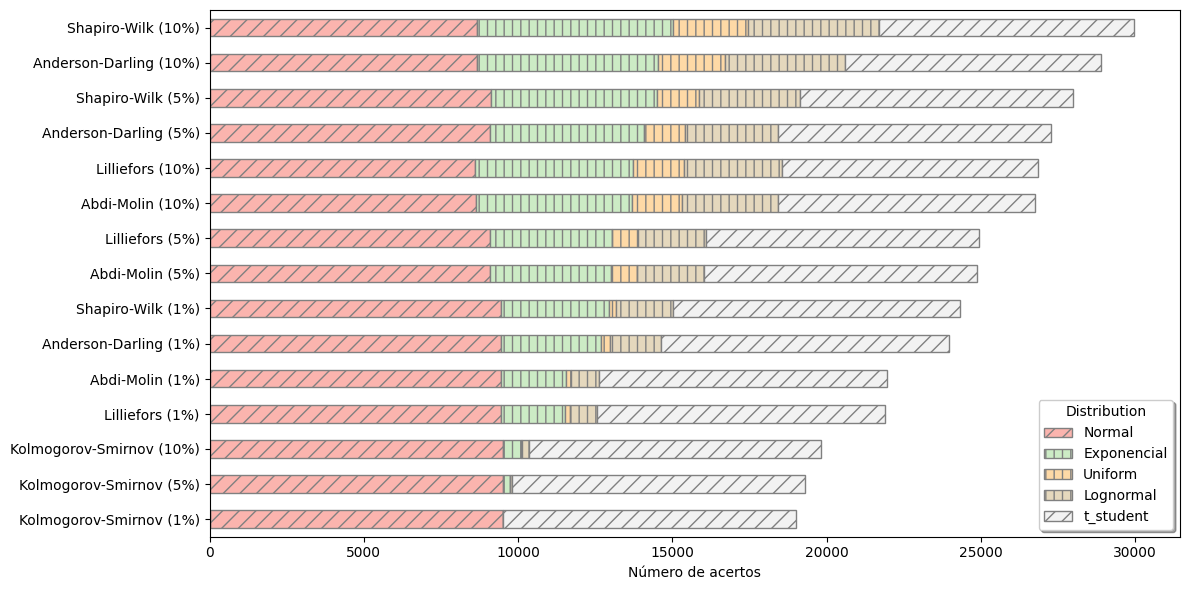

In [72]:
def make_staked_bar(dfs, patterns):
    for i in range(len(patterns)):
        if patterns[i]:
            patterns[i] = "//"
        else:
            patterns[i] = "||"

    df = pd.concat(dfs, axis=1)
    df["soma"] = df.sum(axis=1)
    df = df.sort_values(by="soma")
    df = df.drop("soma", axis=1)
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax = df.plot(kind='barh', stacked=True, ax=ax, cmap="Pastel1")
    # patterns = ('//', '||', '||', '||', '//')
    bars = [thing for thing in ax.containers if isinstance(thing,mpl.container.BarContainer)]
    for bar, pattern in zip(bars, patterns):
        for patch in bar:
            # patch.set_hatch(next(patterns))
            patch.set_hatch(pattern)
            patch.set_edgecolor("gray")
    
    # ax.legend(loc='upper right', bbox_to_anchor=(1.2, 0.95), fancybox=True, shadow=True, title="Alpha",)
    ax.legend(loc='best', fancybox=True, shadow=True, title="Distribution",)
    ax.set_xlabel("Número de acertos")
    fig.tight_layout()
    plt.show()
    
patterns = [True, False, False, False, True]    
make_staked_bar([df_normal_acertos, df_exponential_acertos, df_uniform_acertos, df_lognormal_acertos, df_t_student_acertos], patterns)

## Dados provenientes de uma distribuição Qui quadrado (df=1)

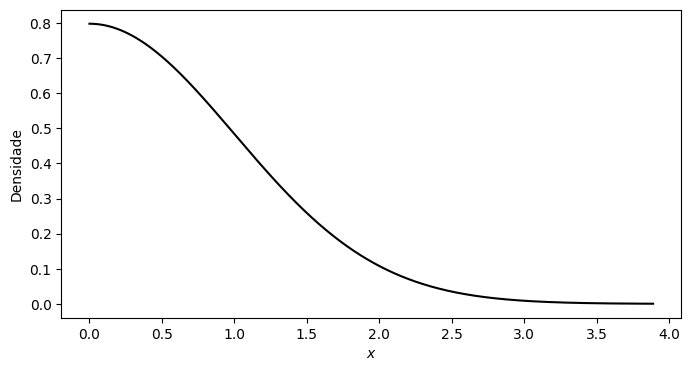

In [77]:
df = 1

plt.subplots(figsize=(8,4))
x = np.linspace(stats.chi.ppf(0.0001, df=df), stats.chi.ppf(0.9999, df=df), 1000)
plt.plot(x, stats.chi.pdf(x, df=df), 'k', label='norm pdf')
plt.xlabel("$x$")
plt.ylabel("Densidade")
plt.show()

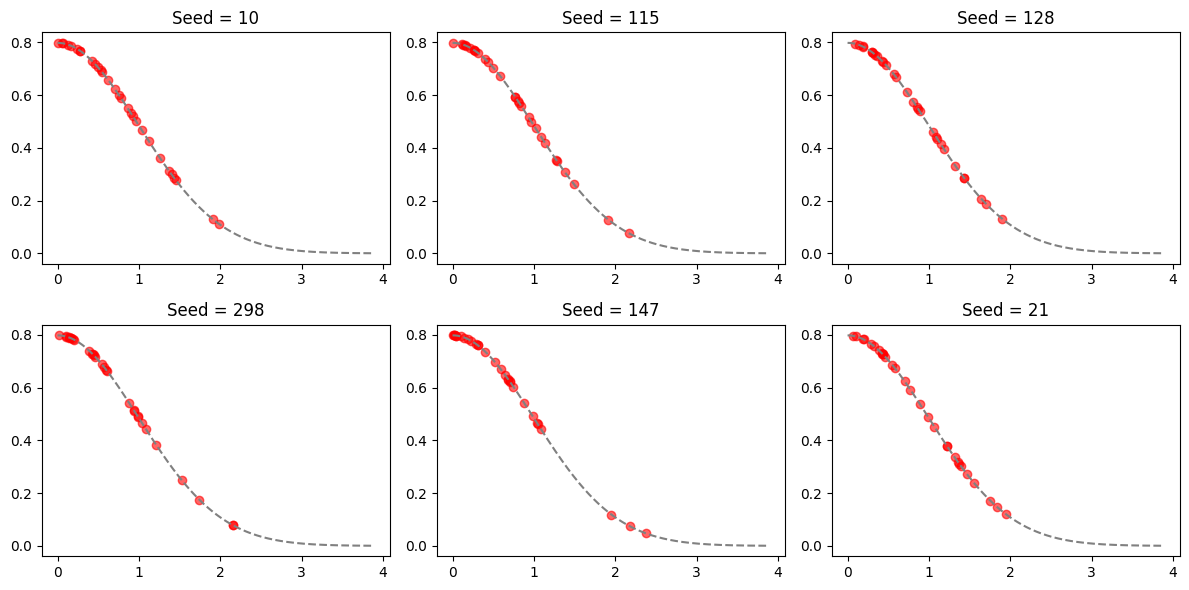

In [81]:
df = 1
x = np.linspace(stats.chi.ppf(0.0001, df=df), stats.chi.ppf(0.9999, df=df), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.chi.pdf(x, df=df), ls='--', c="gray", label='Teórico')
chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,0].scatter(chi_data, stats.chi.pdf(chi_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.chi.pdf(x, df=df), ls='--', c="gray", label='Teórico')
chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,1].scatter(chi_data, stats.chi.pdf(chi_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 2
ax[0,2].plot(x, stats.chi.pdf(x, df=df), ls='--', c="gray", label='Teórico')
chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,2].scatter(chi_data, stats.chi.pdf(chi_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 3
ax[1,0].plot(x, stats.chi.pdf(x, df=df), ls='--', c="gray", label='Teórico')
chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,0].scatter(chi_data, stats.chi.pdf(chi_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.chi.pdf(x, df=df), ls='--', c="gray", label='Teórico')
chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,1].scatter(chi_data, stats.chi.pdf(chi_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.chi.pdf(x, df=df), ls='--', c="gray", label='Teórico')
chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,2].scatter(chi_data, stats.chi.pdf(chi_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

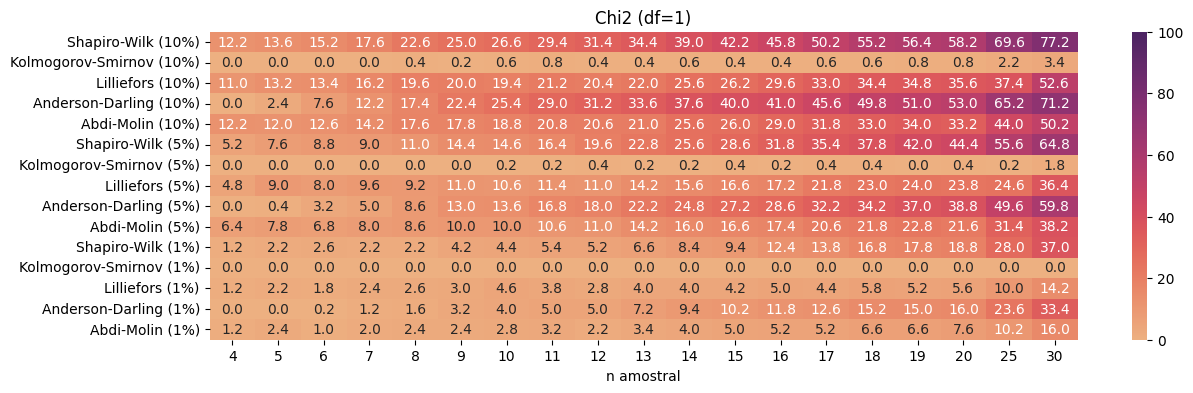

In [83]:
ks_result = []
ad_result = []
li_result = []
shapiro_result = []
abdi_result = []
n_rep_result = []
alpha_result = []

for seed in seeds:
    chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed)
    
    for n in n_rep:
        shapiro_result.append(shapiro_wilk_test(chi_data[:n]))
        ks_result.append(ks_test(chi_data[:n]))
        ad_result.append(anderson_darling(chi_data[:n]))
        li_result.append(lilliefors_test(chi_data[:n]))
        abdi_result.append(abdi_molin(chi_data[:n]))
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = flatten(shapiro_result)
ks_result = flatten(ks_result)
li_result = flatten(li_result)
ad_result = flatten(ad_result)
abdi_result = flatten(abdi_result)
n_rep_result = flatten(n_rep_result)
alpha_result = flatten(alpha_result)        

df_data = pd.DataFrame({
    "Shapiro-Wilk": shapiro_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Anderson-Darling": ad_result,    
    "Abdi-Molin": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

make_heatmap(df_data, "Chi2 (df=1)", n_samples, normal=False)


In [84]:
df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

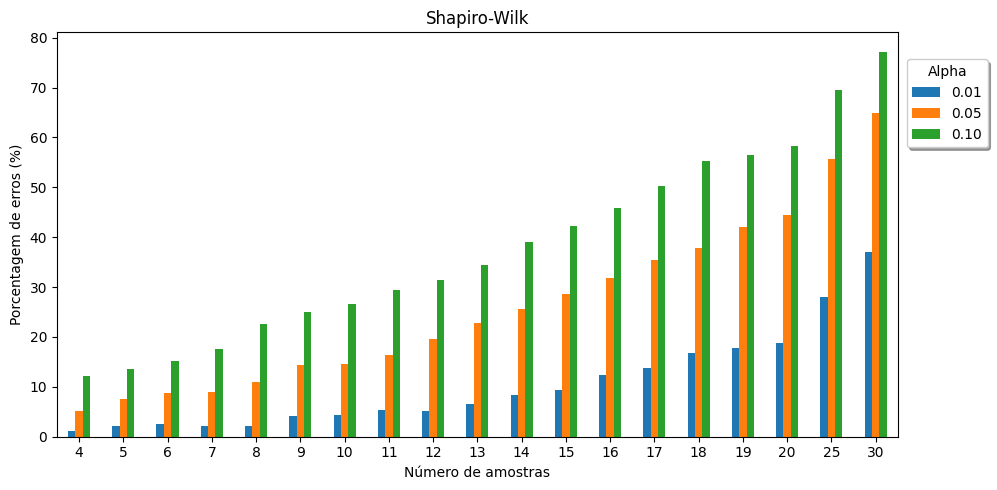

In [90]:
make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=False)

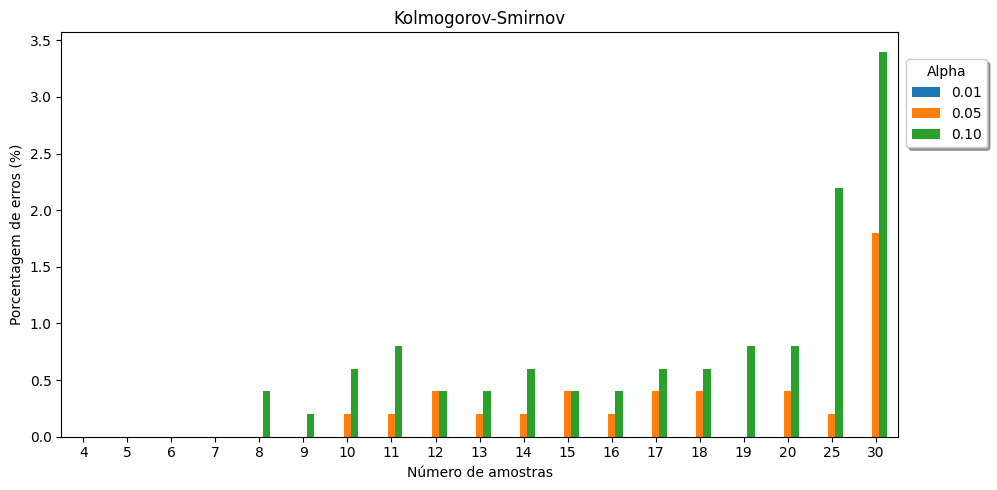

In [91]:
make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=False)

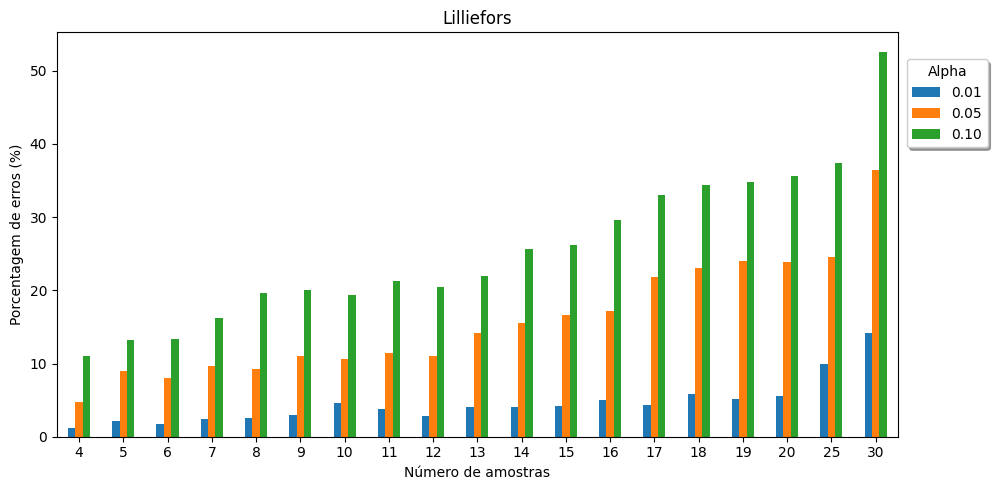

In [92]:
make_bar_plot(df_li, n_samples, "Lilliefors", kind=False)

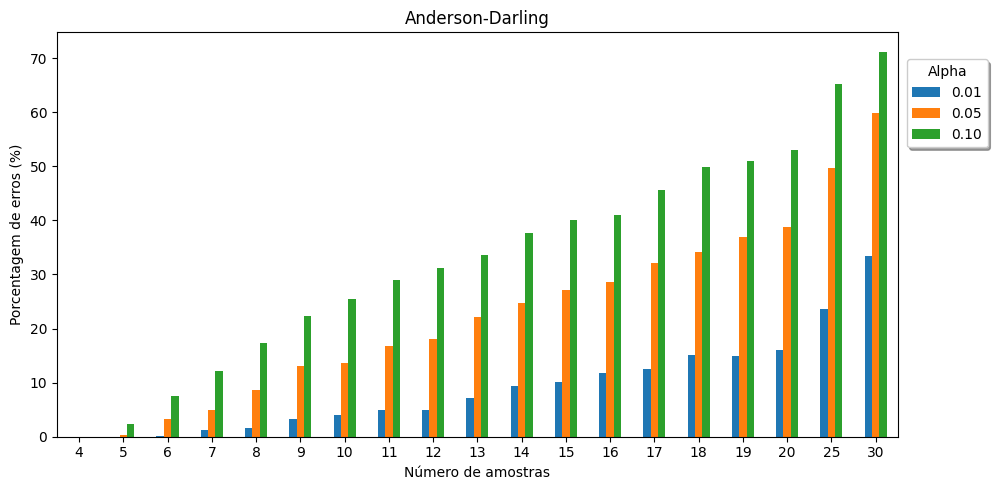

In [93]:
make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=False)

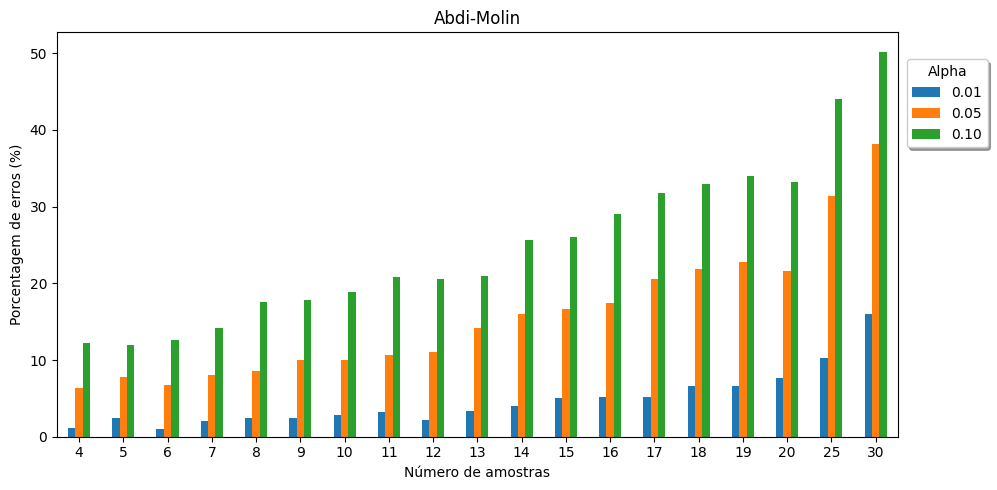

In [94]:
make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=False)

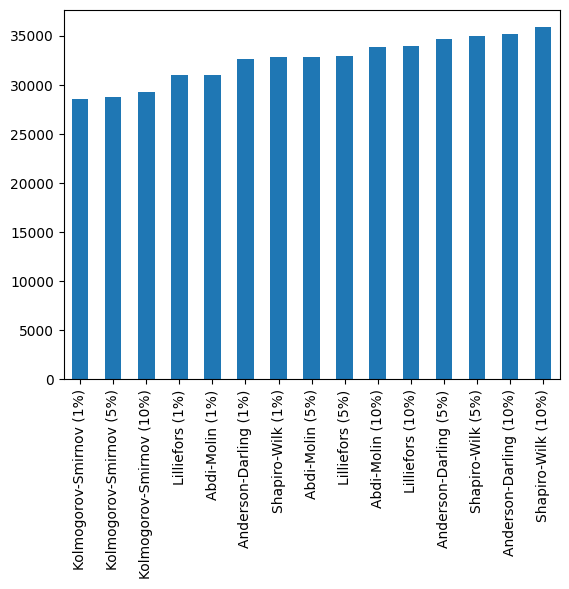

In [95]:
df_chi_df1 = make_calc(df_data, True)
df_chi_df1["Distribution"] = "Chi-Quadrado (df=1)"
plot_all_results(pd.concat([df_normal, df_exponential, df_uniform, df_lognormal, df_t_student, df_chi_df1]))

In [96]:
df_chi_df1_acertos = df_chi_df1.sum(numeric_only = True).to_frame(name="ChiQuadrado (df=1)")

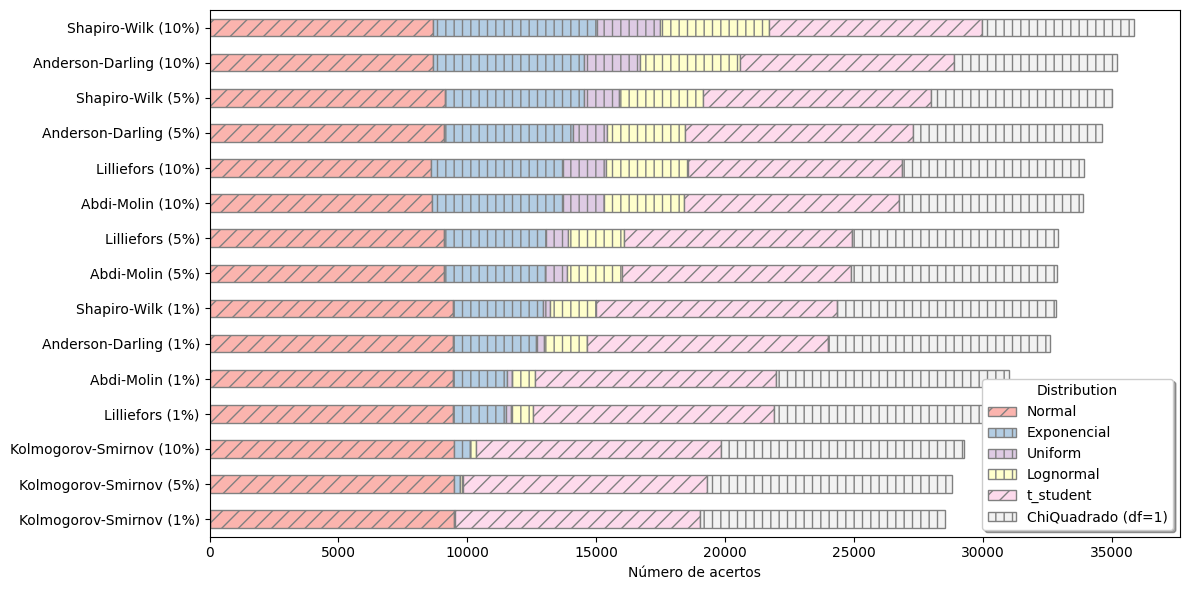

In [97]:
patterns = [True, False, False, False, True, False]    
make_staked_bar([df_normal_acertos, df_exponential_acertos, df_uniform_acertos, df_lognormal_acertos, df_t_student_acertos, df_chi_df1_acertos], patterns)

<AxesSubplot: >

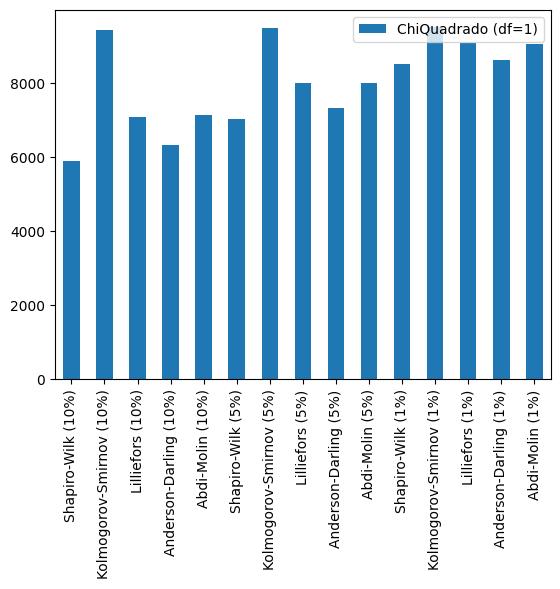

In [98]:
df_chi_df1_acertos.plot(kind="bar")

## Dados provenientes de uma distribuição Weibull (a=5)

In [ ]:
for seed in seed_to_visualize_data:
    rng = np.random.default_rng(seed)
    weibull_data = rng.weibull(a=5, size=size)
    make_kernal_plot(weibull_data, f"Seed = {seed}")


## Dados proveientes de uma distribuição Cauchy

In [ ]:
for seed in seed_to_visualize_data:
    rng = np.random.default_rng(seed)
    standard_cauchy_data = rng.standard_cauchy(size=size)
    make_kernal_plot(standard_cauchy_data, f"Seed = {seed}")


## Dados provenientes de uma distribuição Gamma

In [ ]:
for seed in seed_to_visualize_data:
    rng = np.random.default_rng(seed)
    gamma_data = rng.gamma(shape=1, size=size)
    make_kernal_plot(gamma_data, f"Seed = {seed}")


## Dados provenientes de uma distribuição Logistic

In [ ]:
for seed in seed_to_visualize_data:
    rng = np.random.default_rng(seed)
    logistic_data = rng.logistic(size=size)
    make_kernal_plot(logistic_data, f"Seed = {seed}")


In [ ]:
shapiro_wilk_table = {
    0.01 : (0.753, 0.687, 0.686, 0.713, 0.730, 0.749, 0.764, 0.781, 0.792, 0.805, 0.814, 0.825, 0.835, 0.844, 0.851, 0.858, 0.863, 
            0.868, 0.873, 0.878, 0.881, 0.884, 0.888, 0.891, 0.894, 0.896, 0.898, 0.900, 0.902, 0.904, 0.906, 0.908, 0.910, 0.912, 
            0.914, 0.916, 0.917, 0.919, 0.920, 0.922, 0.923, 0.924, 0.926, 0.927, 0.928, 0.929, 0.929, 0.930),
    0.05 : (0.767, 0.748, 0.762, 0.788, 0.803, 0.818, 0.829, 0.842, 0.850, 0.859, 0.866, 0.874, 0.881, 0.887, 0.892, 0.897, 0.901, 
            0.905, 0.908, 0.911, 0.914, 0.916, 0.918, 0.920, 0.923, 0.924, 0.926, 0.927, 0.929, 0.930, 0.931, 0.933, 0.934, 0.935, 
            0.936, 0.938, 0.939, 0.940, 0.941, 0.942, 0.943, 0.944, 0.945, 0.945, 0.946, 0.947, 0.947, 0.947),
    0.10 : (0.789, 0.792, 0.806, 0.826, 0.838, 0.851, 0.859, 0.869, 0.876, 0.883, 0.889, 0.895, 0.901, 0.906, 0.910, 0.914, 0.917, 
            0.920, 0.923, 0.926, 0.928, 0.930, 0.931, 0.933, 0.935, 0.936, 0.937, 0.939, 0.940, 0.941, 0.942, 0.943, 0.944, 0.945, 
            0.946, 0.947, 0.948, 0.949, 0.950, 0.951, 0.951, 0.952, 0.953, 0.953, 0.954, 0.954, 0.955, 0.955),
}

def shapiro_wilk_test(x):
    n_rep = x.size
    result = stats.shapiro(x)
    if result[0] > shapiro_wilk_table[0.01][n_rep - 3]:
        alfa_0_01 = 1
    else:
        alfa_0_01 = 0
        
    if result[0] > shapiro_wilk_table[0.05][n_rep - 3]:
        alfa_0_05 = 1
    else:
        alfa_0_05 = 0        
        
    if result[0] > shapiro_wilk_table[0.1][n_rep - 3]:
        alfa_0_10 = 1
    else:
        alfa_0_10 = 0        
        
    return alfa_0_01, alfa_0_05, alfa_0_10

In [ ]:
def get_ks_critical(n_rep, alpha):    
    kolmogorov_smirnov = {
        0.10: (0.950, 0.776, 0.642, 0.564, 0.510, 0.470, 0.438, 0.411, 0.388, 0.368, 0.352, 0.338, 0.325, 0.314, 0.304, 0.295, 
               0.286, 0.278, 0.272, 0.264, 0.24, 0.22, 0.21),
        0.05: (0.975, 0.842, 0.708, 0.624, 0.565, 0.521, 0.486, 0.457, 0.432, 0.410, 0.391, 0.375, 0.361, 0.349, 0.338, 0.328, 
               0.318, 0.309, 0.301, 0.294, 0.27, 0.24, 0.23),
        0.01: (0.995, 0.929, 0.828, 0.733, 0.669, 0.618, 0.577, 0.543, 0.514, 0.490, 0.468, 0.450, 0.433, 0.418, 0.404, 0.392, 
               0.381, 0.371, 0.363, 0.356, 0.32, 0.29, 0.27)
        }

    if n_rep < 21:
        if alpha == 0.01:
            tabulated = kolmogorov_smirnov[0.01][n_rep - 1]
        elif alpha == 0.05:
            tabulated = kolmogorov_smirnov[0.05][n_rep - 1]
        elif alpha == 0.10:
            tabulated = kolmogorov_smirnov[0.10][n_rep - 1]
        else:
            tabulated = None #
    elif n_rep < 26:
        if alpha == 0.01:
            tabulated = kolmogorov_smirnov[0.01][20]
        elif alpha == 0.05:
            tabulated = kolmogorov_smirnov[0.05][20]
        elif alpha == 0.10:
            tabulated = kolmogorov_smirnov[0.10][20]
        else:
            tabulated = None #
    elif n_rep < 31:
        if alpha == 0.01:
            tabulated = kolmogorov_smirnov[0.01][21]
        elif alpha == 0.05:
            tabulated = kolmogorov_smirnov[0.05][21]
        elif alpha == 0.10:
            tabulated = kolmogorov_smirnov[0.10][21]
        else:
            tabulated = None #
    elif n_rep < 36:
        if alpha == 0.01:
            tabulated = kolmogorov_smirnov[0.01][22]
        elif alpha == 0.05:
            tabulated = kolmogorov_smirnov[0.05][22]
        elif alpha == 0.10:
            tabulated = kolmogorov_smirnov[0.10][22]
        else:
            tabulated = None #
    else: ## if n_rep is higher than 25, return the aproximation value
        if alpha == 0.01:
            tabulated = 1.63/np.sqrt(n_rep)
        elif alpha == 0.05:
            tabulated = 1.36/np.sqrt(n_rep)
        elif alpha == 0.1:
            tabulated = 1.22/np.sqrt(n_rep)
        else:
            tabulated = None # if you don't have a tabulated value for the chosen alpha value, return None #       
    return tabulated

def ks_test(x):
    n_rep = x.size
    result = stats.kstest(x, cdf='norm', args=(x.mean(), x.std(ddof=1)), N=n_rep)
    if result[0] < get_ks_critical(n_rep, 0.01):
        alfa_0_01 = 1
    else:
        alfa_0_01 = 0
        
    if result[0] < get_ks_critical(n_rep, 0.05):
        alfa_0_05 = 1
    else:
        alfa_0_05 = 0
        
    if result[0] < get_ks_critical(n_rep, 0.1):
        alfa_0_10 = 1
    else:
        alfa_0_10 = 0        
        
    return alfa_0_01, alfa_0_05, alfa_0_10
        

In [ ]:

def get_lilliefors_critical(n_rep, alpha):
    LILLIEFORS_TABLE = {
        0.01 : (0.417, 0.405, 0.364, 0.348, 0.331, 0.311, 0.294, 0.284, 0.275, 0.268, 0.261, 0.257, 0.250, 0.245, 0.239,
                    0.235, 0.231, 0.203, 0.187),
        0.05 : (0.381, 0.337, 0.319, 0.300, 0.285, 0.271, 0.258, 0.249, 0.242, 0.234, 0.227, 0.220, 0.213, 0.206, 0.200,
                    0.195, 0.190, 0.180, 0.161),
        0.10 : (0.352,  0.315, 0.294, 0.276, 0.261, 0.249, 0.239, 0.230, 0.223, 0.214, 0.207, 0.201, 0.195, 0.189, 0.184,
                    0.179, 0.174, 0.165, 0.144)
        }    
    if alpha == 0.01:
        if n_rep < 21:
            tabulated = LILLIEFORS_TABLE[alpha][n_rep - 4]
        elif 20 < n_rep < 26:
            tabulated = LILLIEFORS_TABLE[alpha][17]
        elif 25 < n_rep < 31:
            tabulated = LILLIEFORS_TABLE[alpha][18]
        else:
            tabulated = 1.031/np.sqrt(n_rep)
    elif alpha == 0.05:
        if n_rep < 21:
            tabulated = LILLIEFORS_TABLE[alpha][n_rep - 4]
        elif 20 < n_rep < 26:
            tabulated = LILLIEFORS_TABLE[alpha][17]
        elif 25 < n_rep < 31:
            tabulated = LILLIEFORS_TABLE[alpha][18]
        else:
            tabulated = 0.866/np.sqrt(n_rep)
    elif alpha == 0.10:
        if n_rep < 21:
            tabulated = LILLIEFORS_TABLE[alpha][n_rep - 4]
        elif 20 < n_rep < 26:
            tabulated = LILLIEFORS_TABLE[alpha][17]
        elif 25 < n_rep < 31:
            tabulated = LILLIEFORS_TABLE[alpha][18]
        else:
            tabulated = 0.805/np.sqrt(n_rep)
    else:
        tabulated = None    
    return tabulated


def lilliefors_test(x):
    n_rep = x.size
    result = lilliefors(x, dist='norm', pvalmethod='table')
    if result[0] < get_lilliefors_critical(n_rep, 0.01):
        alfa_0_01 = 1
    else:
        alfa_0_01 = 0
        
    if result[0] < get_lilliefors_critical(n_rep, 0.05):
        alfa_0_05 = 1
    else:
        alfa_0_05 = 0
        
    if result[0] < get_lilliefors_critical(n_rep, 0.1):
        alfa_0_10 = 1
    else:
        alfa_0_10 = 0        
        
    return alfa_0_01, alfa_0_05, alfa_0_10

In [ ]:
shapiro_result = []
ks_result = []
lilliefors_result = []

for i in range(1, size + 1):
    if i < 4:
        pass
    else:
        shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
        ks_result.append(ks_test(normal_data[:i]))
        lilliefors_result.append(lilliefors_test(normal_data[:i]))
        

# shapiro_result

In [ ]:
shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.normal(loc=0.0, scale=1.0, size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
    
    

In [ ]:
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)

In [ ]:
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.exponential(scale=1.0, size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))

In [ ]:
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.uniform(size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))

In [ ]:
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.lognormal(size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()            

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.standard_t(df=5, size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.chisquare(df=5, size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.weibull(a=5, size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.standard_cauchy(size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.gamma(shape=1, size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.logistic(size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = stats.skewnorm.rvs(a=-8, size=size, random_state=seed)


    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []
n_result = []
for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = stats.skewnorm.rvs(a=8, size=size, random_state=seed)


    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            n_result.append(i)
            
# shapiro_result = np.array(shapiro_result)
# ks_result = np.array(ks_result)
# lilliefors_result = np.array(lilliefors_result)
# results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
# results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

# plt.figure(figsize=(6,4))
# plt.bar(results_normal_name, results_normal)
# plt.show()   

In [ ]:
len(n_result*3)

In [ ]:
df = pd.DataFrame({
    "Tamanho amostral": n_result*3,
    "Resultado": shapiro_result + ks_result + lilliefors_result,
    "Teste": ["Shapiro"]*len(shapiro_result) + ["KS"]*len(ks_result)  + ["lilliefors"]*len(lilliefors_result)
})

In [ ]:
df.head(10)